# This Notebook will attempt to reproduce Chevalier et al. SI Fig.3F as described in the SI fig.2 description.

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [38]:
def scaler(df):
    new_df = (df)/np.std(df.values)
    return new_df

In [12]:
A8_experiment = pd.read_pickle('../../data/Experiment/A8_exp_dg.pkl')
A8_experiment

T270      S271      R272      V273      R274      A275      T276  \
S  0.385826       NaN  0.375119 -0.382628  0.222349 -0.595659  0.135656   
R -0.450320 -0.343076       NaN  0.576031       NaN -1.008475  0.473578   
Q  0.295172 -1.162336 -0.276421  1.326393  0.813423  0.492955 -0.969332   
P -0.260126 -0.810464  2.657303 -0.537764 -0.013165  1.187506  0.063572   
W  0.412748  1.257587  1.322399  1.167263  0.205748       NaN  1.011160   
V -0.731326  1.316824 -0.544353       NaN -0.142779 -0.692092 -0.343998   
Y  0.421031  0.681078  2.989229 -0.172272  0.331049  1.344656  1.465929   
C  1.152630  0.991691  2.150102  0.847228  2.344926 -0.790608 -1.162336   
A  0.477583  0.440728 -0.422442 -0.819123  0.330014       NaN -0.111670   
G -0.617346  0.040826  0.964314  0.203142  1.864760 -0.203267  0.294740   
F  0.877291  0.940522  0.654919  0.832652  1.249940  0.837215  0.263017   
E -0.622296 -0.327021  2.334947  0.414830  0.053218 -0.279459  0.201037   
D  0.163329 -0.411018  0.876540  1.032028  6.183090 -0.636781  1.307891   
K  0.280289  0.370465 -1.162336 -0.824653 -0.613535 -0.805935  0.373708   
I -0.069967  3.114735 -0.546082  0.708853 -1.093575  0.572503 -0.067327   
H  0.003562  0.129227 -0.097173 -0.122263  1.071444 -0.472474  0.143336   
N  0.053297 -0.208172  0.832880 -0.001980  0.300486 -1.162336  0.478983   
M  0.458490  0.716226 -0.865684  0.532610 -1.162336 -0.147865  0.831947   
L -1.162336  0.133869 -0.637942  0.672737 -0.057371  0.004005  0.098448   
T       NaN  0.607106 -1.162336  0.065222 -0.536570 -0.208809       NaN   

       S277      K278      F279  ...      V300      N301      G302      Q303  \
S       NaN  1.227365  6.401446  ... -0.512208 -1.162336 -0.206818  0.246313   
R  0.152530 -0.755449  6.668695  ...  1.380259 -0.352725 -0.052694 -0.857469   
Q  0.548563  0.455543  1.699077  ...  0.061160 -1.156761 -0.890752       NaN   
P -0.150323  1.711252  6.432168  ...  1.396838 -1.162336  0.901891  1.267679   
W  0.335862  0.825871 -0.340880  ... -0.461482  0.039814  0.745947  0.858038   
V -0.162771 -0.319295  0.334816  ...       NaN  0.614081 -1.129077 -0.331265   
Y -0.134472 -0.490873  2.475154  ...       NaN -1.162336 -0.285626 -0.382128   
C  3.395968  0.725455  5.842688  ...  0.591972 -0.196770  0.537707  1.013367   
A -1.162336 -0.408776  3.004203  ... -0.889102  0.279868  1.246424 -1.044135   
G -1.162279  0.562706  6.750951  ... -0.532599  1.001591       NaN  0.388022   
F  0.448397  0.681453       NaN  ... -0.345102  1.139488 -0.449057  0.608323   
E -0.207955 -0.749805  6.505309  ... -1.162336 -0.686813 -0.004460  0.421725   
D  0.729483 -0.825268  6.604178  ...  0.449603  0.984784 -1.094053  0.446929   
K -0.972450       NaN  2.369163  ...  0.932181 -1.154007 -0.440637  0.434071   
I  0.328387  0.644405  0.695495  ... -0.550326  0.147501 -0.003527 -1.004549   
H  0.624276 -0.966567       NaN  ... -0.178132 -0.649434 -0.479642  0.292305   
N  0.098482 -0.487960  6.728831  ... -0.492625       NaN -0.147637  0.430419   
M  0.064164  1.045558  0.555515  ...  0.101167  0.476183  0.272836  0.349858   
L  2.073125  0.745231  0.512265  ...  0.057269 -0.967034  0.184231  0.344749   
T -0.680657  0.425150  0.191081  ... -0.483955  0.082631  1.461833 -1.162336   

       W304      E305      V306      T307      F308      D309  
S  0.925365  0.350677  0.831685 -0.904474  2.211376  0.531040  
R  2.067527  0.455827  0.630955 -0.041873  6.498744 -1.162336  
Q  0.643665 -0.140048  2.044872 -0.236095 -1.093848 -0.193402  
P  1.698667  1.467203  1.195823  3.986347  0.935094  0.332790  
W       NaN -1.080490  0.314277  0.393131 -0.478948 -0.128214  
V -0.868336  0.271312       NaN -1.030743  0.663020  0.345238  
Y -1.162336 -0.272950  0.073460 -1.162336  0.163488  0.952628  
C  0.279629  0.534351 -0.274964  0.808712 -1.162336 -0.574608  
A  1.413291  0.206453 -1.162336 -0.232431 -1.162336 -0.068932  
G  1.503569  5.063446 -0.278480 -1.162336  2.660273 -0.069956  
F  0.140230 -0.094829  0.289153 -1.162336     

In [13]:
A8_experiment = pd.read_pickle('../../data/Experiment/A8_exp_dg.pkl')
index = list(pd.read_pickle('../../data/EE/A8_RBFE.pkl').index)
A8_experiment = A8_experiment.fillna(0)
A8_experiment=A8_experiment.reindex(index)
residues = list(A8_experiment.index)
A8_experiment

T270      S271      R272      V273      R274      A275      T276  \
R -0.450320 -0.343076  0.000000  0.576031  0.000000 -1.008475  0.473578   
H  0.003562  0.129227 -0.097173 -0.122263  1.071444 -0.472474  0.143336   
K  0.280289  0.370465 -1.162336 -0.824653 -0.613535 -0.805935  0.373708   
D  0.163329 -0.411018  0.876540  1.032028  6.183090 -0.636781  1.307891   
E -0.622296 -0.327021  2.334947  0.414830  0.053218 -0.279459  0.201037   
S  0.385826  0.000000  0.375119 -0.382628  0.222349 -0.595659  0.135656   
T  0.000000  0.607106 -1.162336  0.065222 -0.536570 -0.208809  0.000000   
N  0.053297 -0.208172  0.832880 -0.001980  0.300486 -1.162336  0.478983   
Q  0.295172 -1.162336 -0.276421  1.326393  0.813423  0.492955 -0.969332   
C  1.152630  0.991691  2.150102  0.847228  2.344926 -0.790608 -1.162336   
G -0.617346  0.040826  0.964314  0.203142  1.864760 -0.203267  0.294740   
P -0.260126 -0.810464  2.657303 -0.537764 -0.013165  1.187506  0.063572   
A  0.477583  0.440728 -0.422442 -0.819123  0.330014  0.000000 -0.111670   
V -0.731326  1.316824 -0.544353  0.000000 -0.142779 -0.692092 -0.343998   
I -0.069967  3.114735 -0.546082  0.708853 -1.093575  0.572503 -0.067327   
L -1.162336  0.133869 -0.637942  0.672737 -0.057371  0.004005  0.098448   
M  0.458490  0.716226 -0.865684  0.532610 -1.162336 -0.147865  0.831947   
F  0.877291  0.940522  0.654919  0.832652  1.249940  0.837215  0.263017   
Y  0.421031  0.681078  2.989229 -0.172272  0.331049  1.344656  1.465929   
W  0.412748  1.257587  1.322399  1.167263  0.205748  0.000000  1.011160   

       S277      K278      F279  ...      V300      N301      G302      Q303  \
R  0.152530 -0.755449  6.668695  ...  1.380259 -0.352725 -0.052694 -0.857469   
H  0.624276 -0.966567  0.000000  ... -0.178132 -0.649434 -0.479642  0.292305   
K -0.972450  0.000000  2.369163  ...  0.932181 -1.154007 -0.440637  0.434071   
D  0.729483 -0.825268  6.604178  ...  0.449603  0.984784 -1.094053  0.446929   
E -0.207955 -0.749805  6.505309  ... -1.162336 -0.686813 -0.004460  0.421725   
S  0.000000  1.227365  6.401446  ... -0.512208 -1.162336 -0.206818  0.246313   
T -0.680657  0.425150  0.191081  ... -0.483955  0.082631  1.461833 -1.162336   
N  0.098482 -0.487960  6.728831  ... -0.492625  0.000000 -0.147637  0.430419   
Q  0.548563  0.455543  1.699077  ...  0.061160 -1.156761 -0.890752  0.000000   
C  3.395968  0.725455  5.842688  ...  0.591972 -0.196770  0.537707  1.013367   
G -1.162279  0.562706  6.750951  ... -0.532599  1.001591  0.000000  0.388022   
P -0.150323  1.711252  6.432168  ...  1.396838 -1.162336  0.901891  1.267679   
A -1.162336 -0.408776  3.004203  ... -0.889102  0.279868  1.246424 -1.044135   
V -0.162771 -0.319295  0.334816  ...  0.000000  0.614081 -1.129077 -0.331265   
I  0.328387  0.644405  0.695495  ... -0.550326  0.147501 -0.003527 -1.004549   
L  2.073125  0.745231  0.512265  ...  0.057269 -0.967034  0.184231  0.344749   
M  0.064164  1.045558  0.555515  ...  0.101167  0.476183  0.272836  0.349858   
F  0.448397  0.681453  0.000000  ... -0.345102  1.139488 -0.449057  0.608323   
Y -0.134472 -0.490873  2.475154  ...  0.000000 -1.162336 -0.285626 -0.382128   
W  0.335862  0.825871 -0.340880  ... -0.461482  0.039814  0.745947  0.858038   

       W304      E305      V306      T307      F308      D309  
R  2.067527  0.455827  0.630955 -0.041873  6.498744 -1.162336  
H -1.162336  0.452937 -0.273690  1.105523  0.232101 -0.066883  
K  0.329581  4.385543  2.409341  0.710378  0.205202 -0.481656  
D  0.202812  0.259580  0.881068 -0.021198  0.631308  0.000000  
E  0.272415  0.000000  0.705531  0.351940  1.062352 -0.136703  
S  0.925365  0.350677  0.831685 -0.904474  2.211376  0.531040  
T  1.473700  1.155964 -0.255290  0.000000  0.424707  0.209514  
N  2.247776 -1.048436 -1.161813  1.149444 -0.670678 -0.029766  
Q  0.643665 -0.140048  2.044872 -0.236095 -1.093848 -0.193402  
C  0.279629  0.534351 -0.274964  0.808712 -1.162336 -0.574608  
G  1.503569  5.063446 -0.278480 -1.162336  2.6

In [14]:
A8_sequence = open('../sequences/A8_sequence.afasta','r').readlines()[0].strip('\n')
A13_sequence = open('../sequences/A13_sequence.afasta','r').readlines()[0].strip('\n')
A8_sequence = open('../sequences/A8_sequence.afasta','r').readlines()[0].strip('\n')

In [15]:
initial_screen = '03_HighThroughputDesign_FluH1_Gen1_relax.dat'
ssm_screen = '06_HighThroughputDesign_FluH1_Gen2_relax.dat'

In [16]:
# Specify the number of rows to skip
skip_rows = 96 # Replace with the actual number of rows you want to skip
# Read the CSV file, skipping the specified number of rows
df = pd.read_csv(initial_screen, skiprows=skip_rows)

In [17]:
initial = open(initial_screen,'r').readlines()
columns = initial[95].split()
initial_dictionary = {i:[] for i in columns}
for line in initial[96:]:
    stuff = line.split()
    [initial_dictionary[list(initial_dictionary.keys())[i]].append(val) for i,val in enumerate(stuff)]
df1 = pd.DataFrame(initial_dictionary)

In [18]:
_=[print(i) for i in df1.columns]

#ID
Category
Sequence
[rd0_seqMatch,rd2_1000nM_seqMatch,rd2_100nM_seqMatch,rd2_10nM_seqMatch]
[Enrichment_rd0_seqMatch,Enrichment_rd2_1000nM_seqMatch,Enrichment_rd2_100nM_seqMatch,Enrichment_rd2_10nM_seqMatch]
Mono_total_score
Mono_AlaCount
Mono_bb
Mono_buried_minus_exposed
Mono_buried_np
Mono_buried_over_exposed
Mono_cavity_volume
Mono_contact_all
Mono_contact_core_SASA
Mono_contact_core_SCN
Mono_degree
Mono_dslf_fa13
Mono_dslf_quality_check
Mono_entropy
Mono_exposed_hydrophobics
Mono_exposed_polars
Mono_exposed_total
Mono_fa_atr
Mono_fa_dun
Mono_fa_elec
Mono_fa_intra_rep
Mono_fa_intra_sol_xover4
Mono_fa_rep
Mono_fa_sol
Mono_fxn_exposed_is_np
Mono_hbond_bb_sc
Mono_hbond_lr_bb
Mono_hbond_sc
Mono_hbond_sr_bb
Mono_helix_sc
Mono_holes
Mono_lk_ball_wtd
Mono_loop_sc
Mono_mean_dslf
Mono_mismatch_probability
Mono_omega
Mono_one_core_each
Mono_p_aa_pp
Mono_pack
Mono_percent_core_SASA
Mono_percent_core_SCN
Mono_pro_close
Mono_rama_prepro
Mono_ref
Mono_res_count_core_SASA
Mono_res_count_core_SCN

In [19]:
ssm = open(ssm_screen,'r').readlines()
columns = ssm[68].split()[1:]
ssm_dictionary = {i:[] for i in columns}
for line in ssm[69:]:
    stuff = line.split()
    [ssm_dictionary[list(ssm_dictionary.keys())[i]].append(val) for i,val in enumerate(stuff)]
df2 = pd.DataFrame(ssm_dictionary)

In [20]:
sequences=[A8_sequence,A13_sequence,A8_sequence]
A8 = df1[df1['Sequence'] == sequences[0]]
A13 = df1[df1['Sequence'] == sequences[1]]
A8 = df1[df1['Sequence'] == sequences[2]]
WT = pd.concat([A8,A13,A8])
scores = ['#ID','Sequence']+[ i for i in columns if 'score' in i]+ [i for i in columns if 'ddg' in i]
WT = WT[scores]

In [21]:
WT

#ID                                  Sequence Mono_total_score  \
4186  HB1.5702.3  TSRVRATSKFAALIAAEIAREFGYTVDVQEVNGQWEVTFD            -3.19   
7994  HB1.6928.2  CIEISVTTPFACQIAAEIWRAFGYEVKIDDDNGNCRLHVC            -3.09   
4186  HB1.5702.3  TSRVRATSKFAALIAAEIAREFGYTVDVQEVNGQWEVTFD            -3.19   

     Complex_total_score Complex_ddg Complex_ddg_fa_atr  \
4186              -47.83       -2.98              -2.91   
7994              -52.34       -2.28              -2.37   
4186              -47.83       -2.98              -2.91   

     Complex_ddg_fa_atr_norepack Complex_ddg_fa_atr_norepack_per_1000sasa  \
4186                       -3.34                                    -1.97   
7994                       -3.01                                    -1.99   
4186                       -3.34                                    -1.97   

     Complex_ddg_fa_atr_per_1000sasa Complex_ddg_norepack  \
4186                           -1.71                -3.44   
7994                           -1.56                -2.95   
4186                           -1.71                -3.44   

     Complex_ddg_norepack_per_1000sasa Complex_ddg_per_1000sasa  
4186                             -2.03                    -1.76  
7994                             -1.95                    -1.50  
4186                             -2.03                    -1.76

In [22]:
dfs = []
for sequence in sequences:
    for i in range(len(sequence)):
        for aa in residues:
            new_seq=sequence[:i] + aa + sequence[i + 1:]
            temp_df = df2[df2['Sequence'] == new_seq]
            dfs.append(temp_df)
scores = ['Sequence']+[ i for i in columns if 'score' in i]+ [i for i in columns if 'ddg' in i]
muts = pd.concat(dfs)
muts = muts[scores]        

In [23]:
muts

Sequence Mono_total_score  \
800   RSRVRATSKFAALIAAEIAREFGYTVDVQEVNGQWEVTFD            -2.84   
816   HSRVRATSKFAALIAAEIAREFGYTVDVQEVNGQWEVTFD            -2.77   
814   KSRVRATSKFAALIAAEIAREFGYTVDVQEVNGQWEVTFD            -3.04   
813   DSRVRATSKFAALIAAEIAREFGYTVDVQEVNGQWEVTFD            -2.83   
812   ESRVRATSKFAALIAAEIAREFGYTVDVQEVNGQWEVTFD            -3.04   
...                                        ...              ...   
2560  TSRVRATSKFAALIAAEIAREFGYTVDVQEVNGQWEVTFL            -3.08   
2559  TSRVRATSKFAALIAAEIAREFGYTVDVQEVNGQWEVTFM            -3.12   
2554  TSRVRATSKFAALIAAEIAREFGYTVDVQEVNGQWEVTFF            -3.06   
2546  TSRVRATSKFAALIAAEIAREFGYTVDVQEVNGQWEVTFY            -2.93   
2544  TSRVRATSKFAALIAAEIAREFGYTVDVQEVNGQWEVTFW            -2.89   

     Complex_total_score Complex_ddg Complex_ddg_fa_atr  \
800               -47.05       -2.79              -2.95   
816               -46.51       -2.85              -2.90   
814               -47.08       -3.13              -2.88   
813               -46.61       -2.70              -2.95   
812               -47.70       -3.00              -2.92   
...                  ...         ...                ...   
2560              -47.22       -3.02              -2.92   
2559              -47.63       -2.86              -2.91   
2554              -47.66       -2.95              -2.94   
2546              -46.34       -2.76              -3.29   
2544              -46.75       -2.73              -2.92   

     Complex_ddg_fa_atr_norepack Complex_ddg_fa_atr_norepack_per_1000sasa  \
800                        -3.37                                    -1.99   
816                        -3.37                                    -1.97   
814                        -3.37                                    -1.96   
813                        -3.43                                    -2.01   
812                        -3.37                                    -2.00   
...                          ...                                      ...   
2560                       -3.37                                    -1.97   
2559                       -3.29                                    -1.94   
2554                       -3.35                                    -1.98   
2546                       -3.38                                    -1.96   
2544                       -3.35                                    -1.96   

     Complex_ddg_fa_atr_per_1000sasa Complex_ddg_norepack  \
800                            -1.74                -3.34   
816                            -1.70                -3.40   
814                            -1.68                -3.57   
813                            -1.73                -3.25   
812                            -1.73                -3.49   
...                              ...                  ...   
2560                           -1.71                -3.50   
2559                           -1.72                -3.33   
2554                           -1.74                -3.43   
2546                           -1.90                -3.31   
2544                           -1.71                -3.26   

     Complex_ddg_norepack_per_1000sasa Complex_ddg_per_1000sasa  
800                              -1.97                    -1.65  
816                              -1.99                    -1.67  
814                              -2.08                    -1.82  
813                              -1.91                    -1.58  
812                              -2.07                    -1.77  
...                                ...                      ...  
2560                             -2.04                    -1.76  
2559                             -1.97                    -1.68  
2554                             -2.03                    -1.74  
2546                             -1.92                    -1.60  
2544                             -1.91                    -1.60  

[2390 rows x 11 columns]

# To Compare, These are the values from the backmapped rosetta values from the paper (SI fig 3.f)

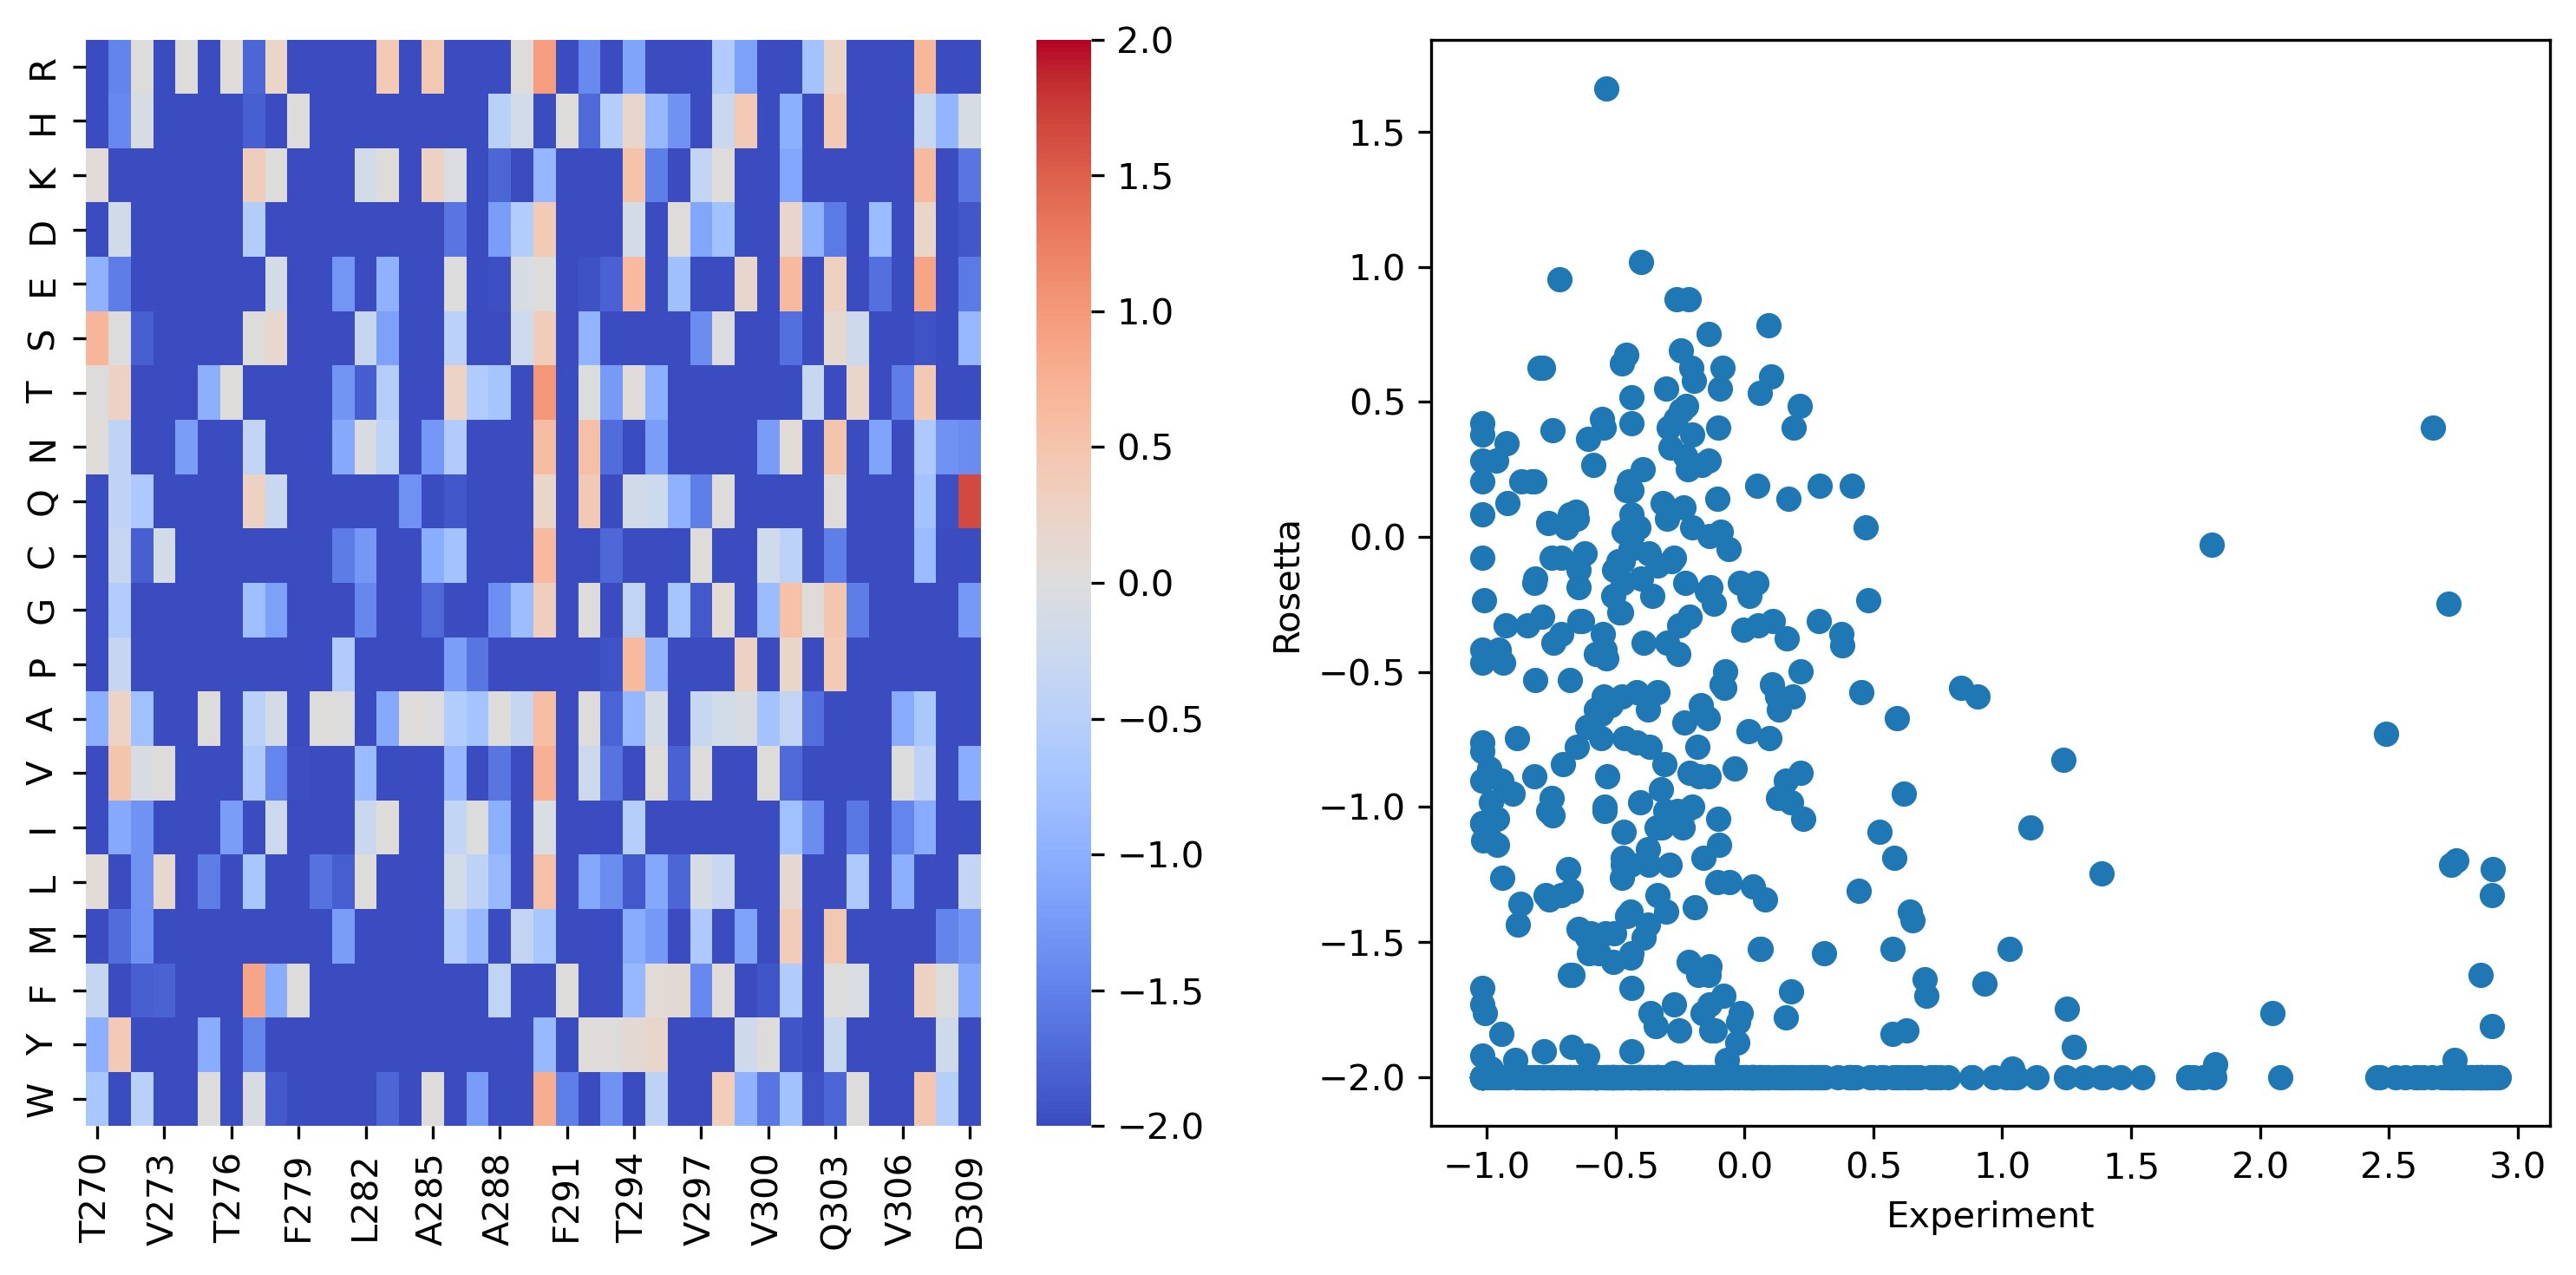

In [24]:
fig,ax = plt.subplots(1,2,figsize=(10,5),dpi=300)
normalized_exp = scaler(A8_experiment)
ax1,ax2 = ax.flat
previous_backmapped = np.load('../../data/rosetta_backmapped/A8r_backmapped.npy')
A8_backmapped = pd.DataFrame(previous_backmapped,columns=A8_experiment.columns,index=A8_experiment.index)
sns.heatmap(A8_backmapped,vmin=-2,vmax=2,cmap='coolwarm',ax=ax1)
ax2.scatter(normalized_exp,A8_backmapped)
ax2.set_xlabel('Experiment')
ax2.set_ylabel('Rosetta')
fig.tight_layout()

(array([446.,   7.,   9.,  10.,   7.,   8.,   9.,   9.,   8.,   9.,  11.,
          8.,   8.,  15.,   8.,  10.,   7.,   8.,   8.,  12.,   6.,  11.,
          9.,  10.,  13.,   5.,  12.,  47.,   9.,   9.,   9.,   5.,  10.,
          8.,   4.,   6.,   3.,   1.,   1.,   2.,   1.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-2.        , -1.92680681, -1.85361361, -1.78042042, -1.70722723,
        -1.63403403, -1.56084084, -1.48764765, -1.41445445, -1.34126126,
        -1.26806807, -1.19487487, -1.12168168, -1.04848849, -0.9752953 ,
        -0.9021021 , -0.82890891, -0.75571572, -0.68252252, -0.60932933,
        -0.53613614, -0.46294294, -0.38974975, -0.31655656, -0.24336336,
        -0.17017017, -0.09697698, -0.02378378,  0.04940941,  0.1226026 ,
         0.1957958 ,  0.26898899,  0.34218218,  0.41537538,  0.48856857,
         0.56176176,  0.63495495,  0.70814815,  0.78134134,  0.85453453,
         0.92772773,  1.00092092,  1.07411411,  1.14730731,  1.2205005 ,
 

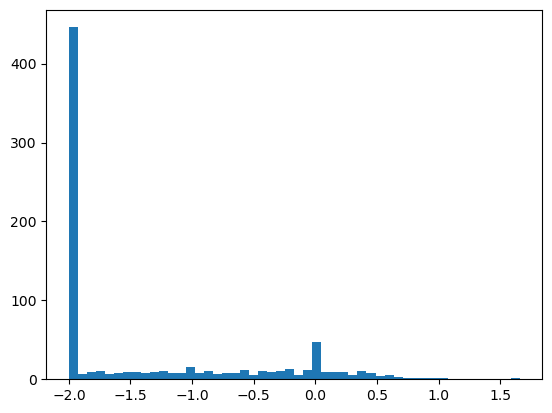

In [46]:
plt.hist(A8_backmapped.values.flatten(),bins=50)

### In SI Figure 2, the authors claim this is how they treated the data. Below we try to reproduce this treatment.

The overall procedure used to calculate the experimental vs. computational (Rosetta) SSM correlation.
For the experimental SSMs, each mutant was assigned to a binding category as in Extended Data Fig. 2,
and a per-mutation score was calculated as the change in category compared with the designed (native)
residue at that position (a positive score indicates a mutation improves binding). We then normalized
these values for the whole dataset (σ2 =1) and calculated the average score of all mutations at each
position. **For the computational SSMs, we built computational models of each mutant and used them to
calculate the change in monomeric and binding energy compared with the original design. We then
normalized the monomeric and binding datasets separately (σ2 =1), summed them to compute an overall
score for each mutation (for consistency, we made positive scores indicate improved binding)**, and again
calculated the average of these scores at each position. Finally, we calculated the Pearson correlation
between the per-position scores from the computational and experimental SSMs. When the size of the
proteins differed, we just considered a 1-1 amino-acid correspondence starting from their first residues
and ending at the length of the smallest protein in the pair. b) The results of the calculation described in
“a” applied to 8 proteins included in the experiments and compared to all of its computational SSMs and
8 negative controls, including 2 natural proteins (previously reported HA binders HB36 and HB80) and 6
other designs chosen randomly. Most of the experimental data correlate better with the computational
data for the same protein (i.e. HB1.6928.2, HB1.6394.2, HB1.5118.3 for HB1 designs, and Bot.671.2,
Bot.791.3 for Bot designs) than with any other (unrelated) protein, and thus provides an indirect structural
validation of the designed model.

# We can calculate the ddG a few different ways. These following treatments use the Complex_ddG scores. 

## Data Treatment 1.

In [25]:
A8_ros_1 = {res+str(270+i):{aa:0 for aa in residues} for i,res in enumerate(A8_sequence)}
for i,res in enumerate(A8_sequence):
        for aa in residues:
            new_seq=sequence[:i] + aa + sequence[i + 1:]
            temp_df = muts[muts['Sequence'] == new_seq]
            num = str(int(270)+int(i))
            key = ''.join([res,num])
            try:
                A8_ros_1[key][aa] += float(temp_df.Complex_ddg.values[0])
            except:
                pass

In [26]:
A8_ros_1 = pd.DataFrame(A8_ros_1)
normalized_df1 = scaler(A8_ros_1)

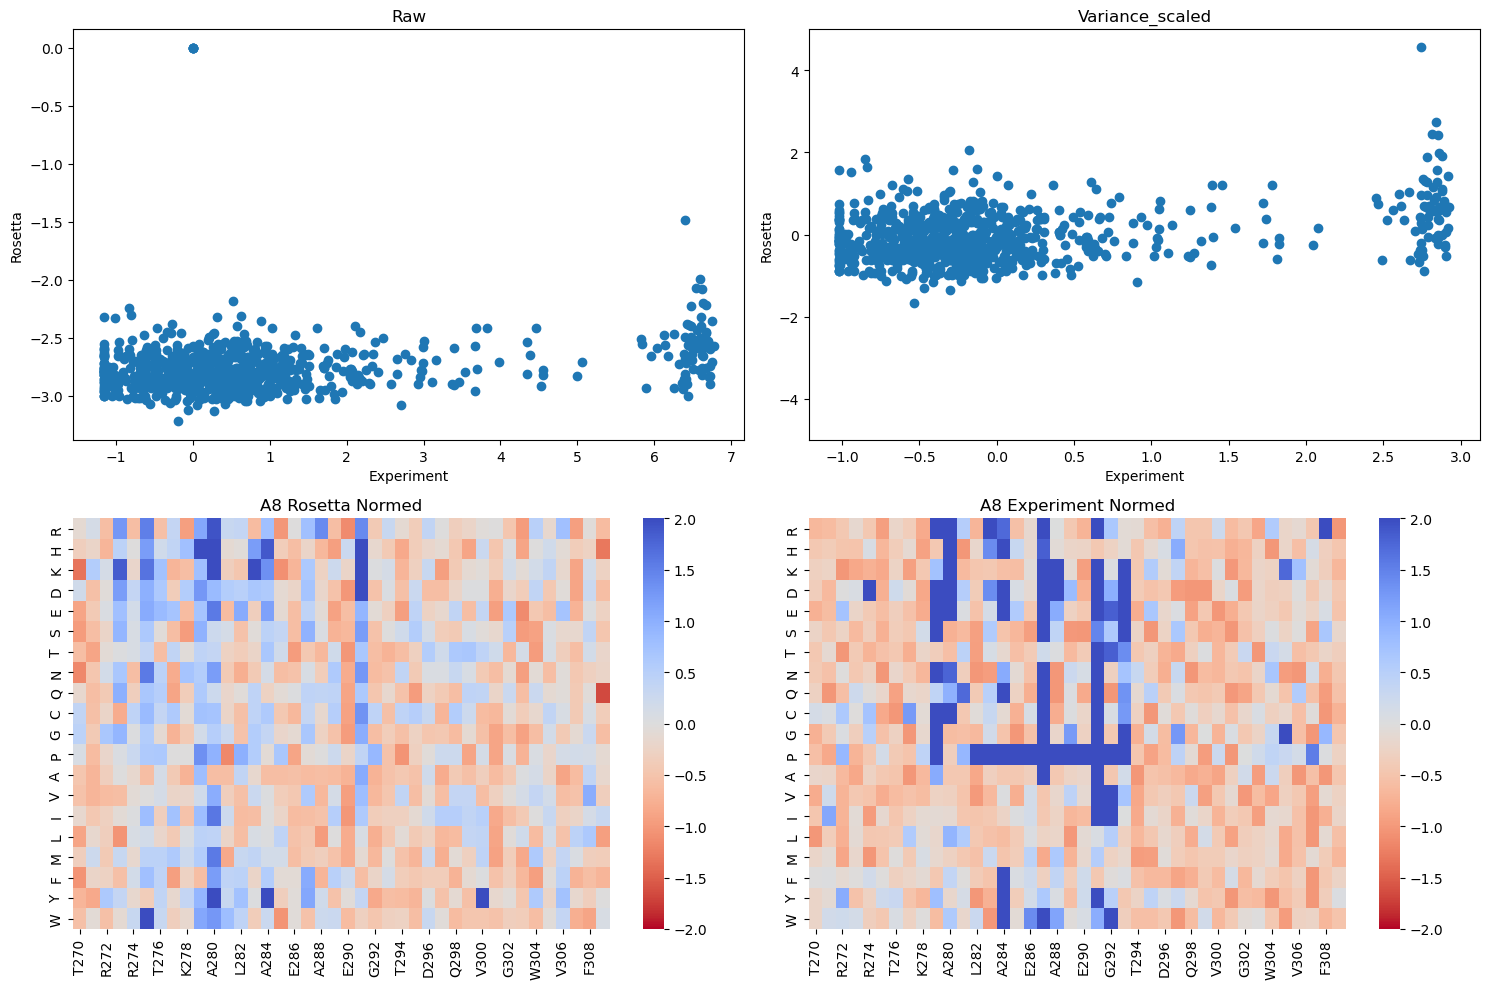

In [27]:
fig,axes = plt.subplots(2,2,figsize=(15,10))
ax1,ax2,ax3,ax4 = axes.flat
ax1.scatter(A8_experiment,A8_ros_1)
ax2.scatter(normalized_exp,normalized_df1)
sns.heatmap(normalized_df1,vmin=-2,vmax=2,ax=ax3,cmap='coolwarm_r')
sns.heatmap(normalized_exp,vmin=-2,vmax=2,ax=ax4,cmap='coolwarm_r')
ax2.set_ylim(-5,5)
ax1.set_title('Raw')
ax2.set_title('Variance_scaled')
ax3.set_title('A8 Rosetta Normed')
ax4.set_title('A8 Experiment Normed')
ax1.set_xlabel('Experiment')
ax1.set_ylabel('Rosetta')
ax2.set_xlabel('Experiment')
ax2.set_ylabel('Rosetta')
fig.tight_layout()

# We can also subtract out the wild type score.

## Data Treatment 2

In [28]:
A8_ros_2 = A8_ros_1-float(WT.Complex_ddg.values[0])
normalized_df2 = scaler(A8_ros_2)

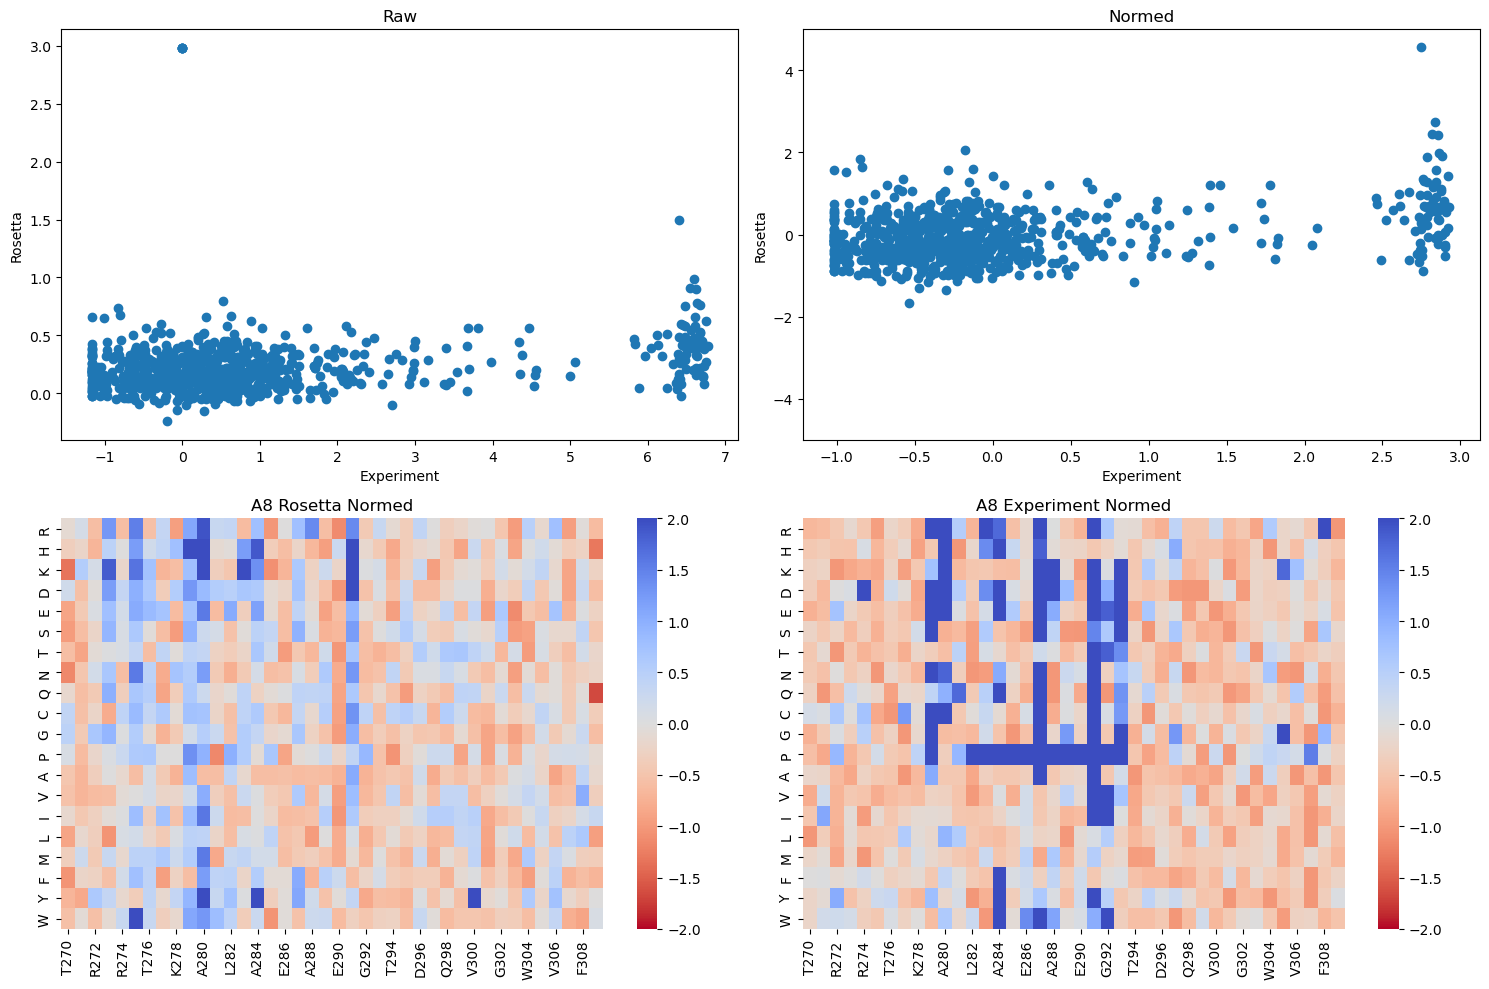

In [29]:
fig,axes = plt.subplots(2,2,figsize=(15,10))
ax1,ax2,ax3,ax4 = axes.flat
ax1.scatter(A8_experiment,A8_ros_2)
ax2.scatter(normalized_exp,normalized_df2)
sns.heatmap(normalized_df2,vmin=-2,vmax=2,ax=ax3,cmap='coolwarm_r')
sns.heatmap(normalized_exp,vmin=-2,vmax=2,ax=ax4,cmap='coolwarm_r')
ax2.set_ylim(-5,5)
ax1.set_title('Raw')
ax2.set_title('Variance_scaled')
ax3.set_title('A8 Rosetta Normed')
ax4.set_title('A8 Experiment Normed')
ax1.set_title('Raw')
ax2.set_title('Normed')
ax3.set_title('A8 Rosetta Normed')
ax4.set_title('A8 Experiment Normed')
ax1.set_xlabel('Experiment')
ax1.set_ylabel('Rosetta')
ax2.set_xlabel('Experiment')
ax2.set_ylabel('Rosetta')
fig.tight_layout()

# This one is it, the scores are still terrible,we can convert these to kcal/mol now.

## Data Treatment 3

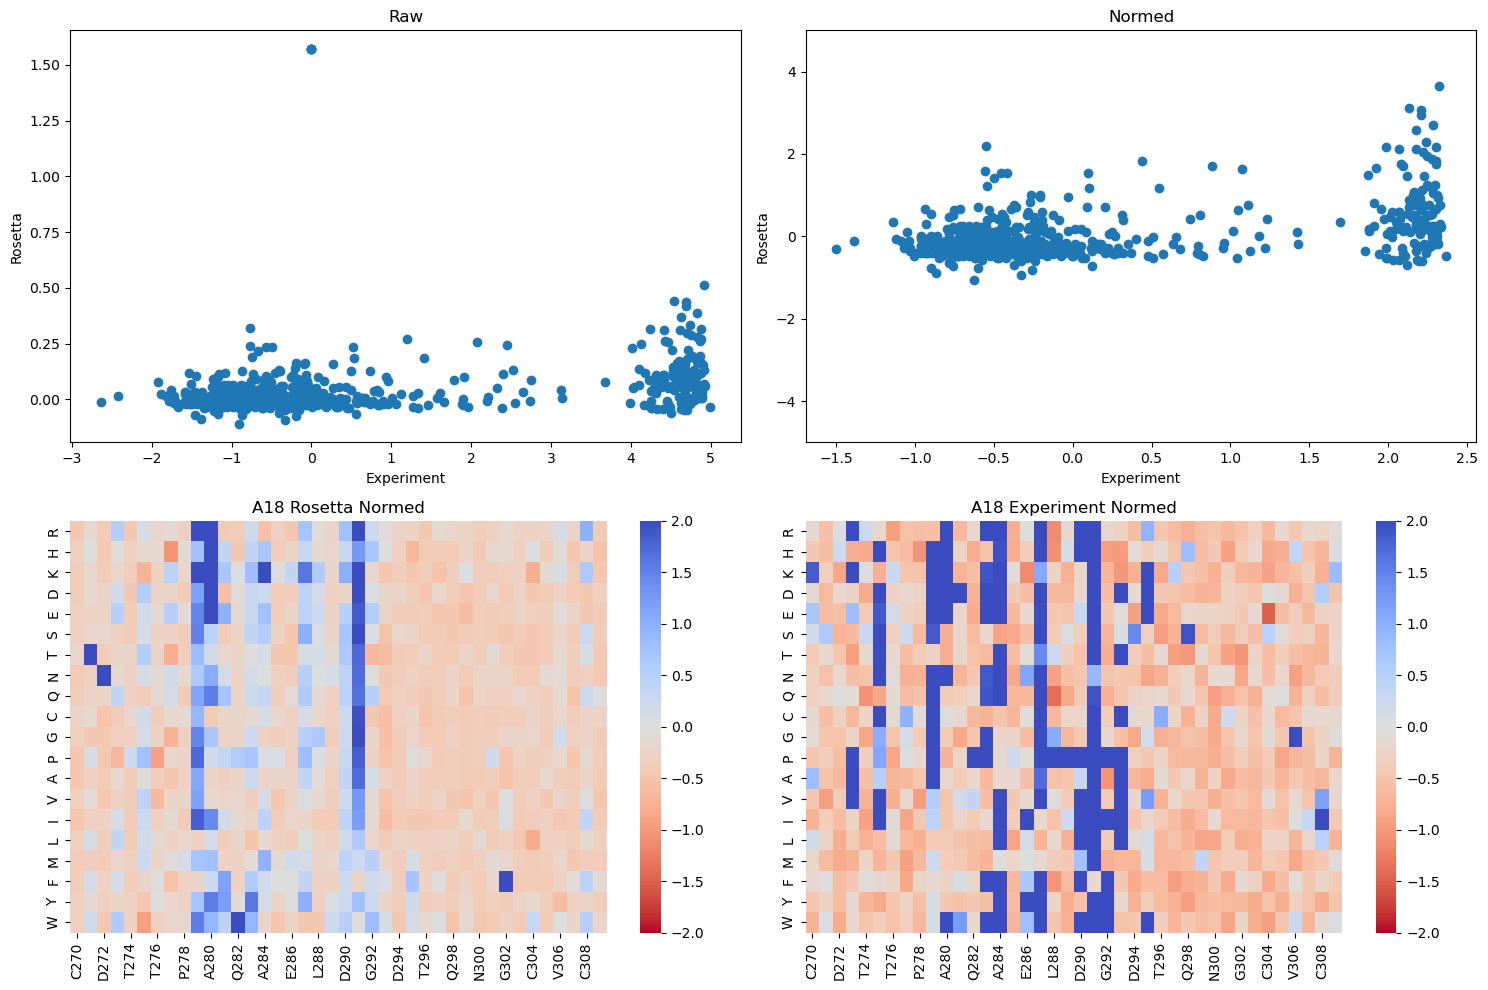

In [21]:
A8_ros_3 = A8_ros_2 / 1.84
normalized_df3 = scaler(A8_ros_3)
fig,axes = plt.subplots(2,2,figsize=(15,10))
ax1,ax2,ax3,ax4 = axes.flat
ax1.scatter(A8_experiment,A8_ros_3)
ax2.scatter(normalized_exp,normalized_df3)
sns.heatmap(normalized_df3,vmin=-2,vmax=2,ax=ax3,cmap='coolwarm_r')
sns.heatmap(normalized_exp,vmin=-2,vmax=2,ax=ax4,cmap='coolwarm_r')
ax2.set_ylim(-5,5)
ax1.set_title('Raw')
ax2.set_title('Normed')
ax3.set_title('A8 Rosetta Normed')
ax4.set_title('A8 Experiment Normed')
ax1.set_xlabel('Experiment')
ax1.set_ylabel('Rosetta')
ax2.set_xlabel('Experiment')
ax2.set_ylabel('Rosetta')
fig.tight_layout()

# We can also try data treatment 4

In [39]:
def create_dfs(dic):
    temp_d = {res+str(270+i):{aa:0 for aa in residues} for i,res in enumerate(A8_sequence)}
    temp_norm = {res+str(270+i):{aa:0 for aa in residues} for i,res in enumerate(A8_sequence)}
    complex=[]
    mono=[]
    for key1,val1 in dic.items():
        for key2,val2 in val1.items():
            for key3,val3 in val2.items():
                if key3 == 'Complex':
                    complex.append(val3)
                if key3 == 'Mono':
                    mono.append(val3)
    c_mean = np.mean(complex)
    c_std = np.std(complex)
    m_mean = np.mean(mono)
    m_std = np.mean(mono)
    for key1,val1 in dic.items():
        for aa,val2 in val1.items():
            c = val2['Complex']
            m = val2['Mono']
            temp_d[key1][aa]+=c+m
            c_norm = (c)/c_std
            m_norm = (m)/m_std
            val = m_norm-c_norm
            temp_norm[key1][aa]+=val
    return pd.DataFrame(temp_d),pd.DataFrame(temp_norm)

In [47]:
temp_dic = {res+str(270+i):{aa:{'Complex':0,'Mono':0} for aa in residues} for i,res in enumerate(A8_sequence)}
for i,res in enumerate(A8_sequence):
        for aa in residues:
            new_seq=sequence[:i] + aa + sequence[i + 1:]
            temp_df = muts[muts['Sequence'] == new_seq]
            num = str(int(270)+int(i))
            key = ''.join([res,num])
            try:
                temp_dic[key][aa]['Complex'] += (float(temp_df.Complex_total_score.values[0])-float(WT.Complex_total_score.values[0]))
                temp_dic[key][aa]['Mono'] += (float(temp_df.Mono_total_score.values[0])-float(WT.Mono_total_score.values[0]))
            except:
                pass

In [48]:
A8_ros_4,normalized_df4 = create_dfs(temp_dic)

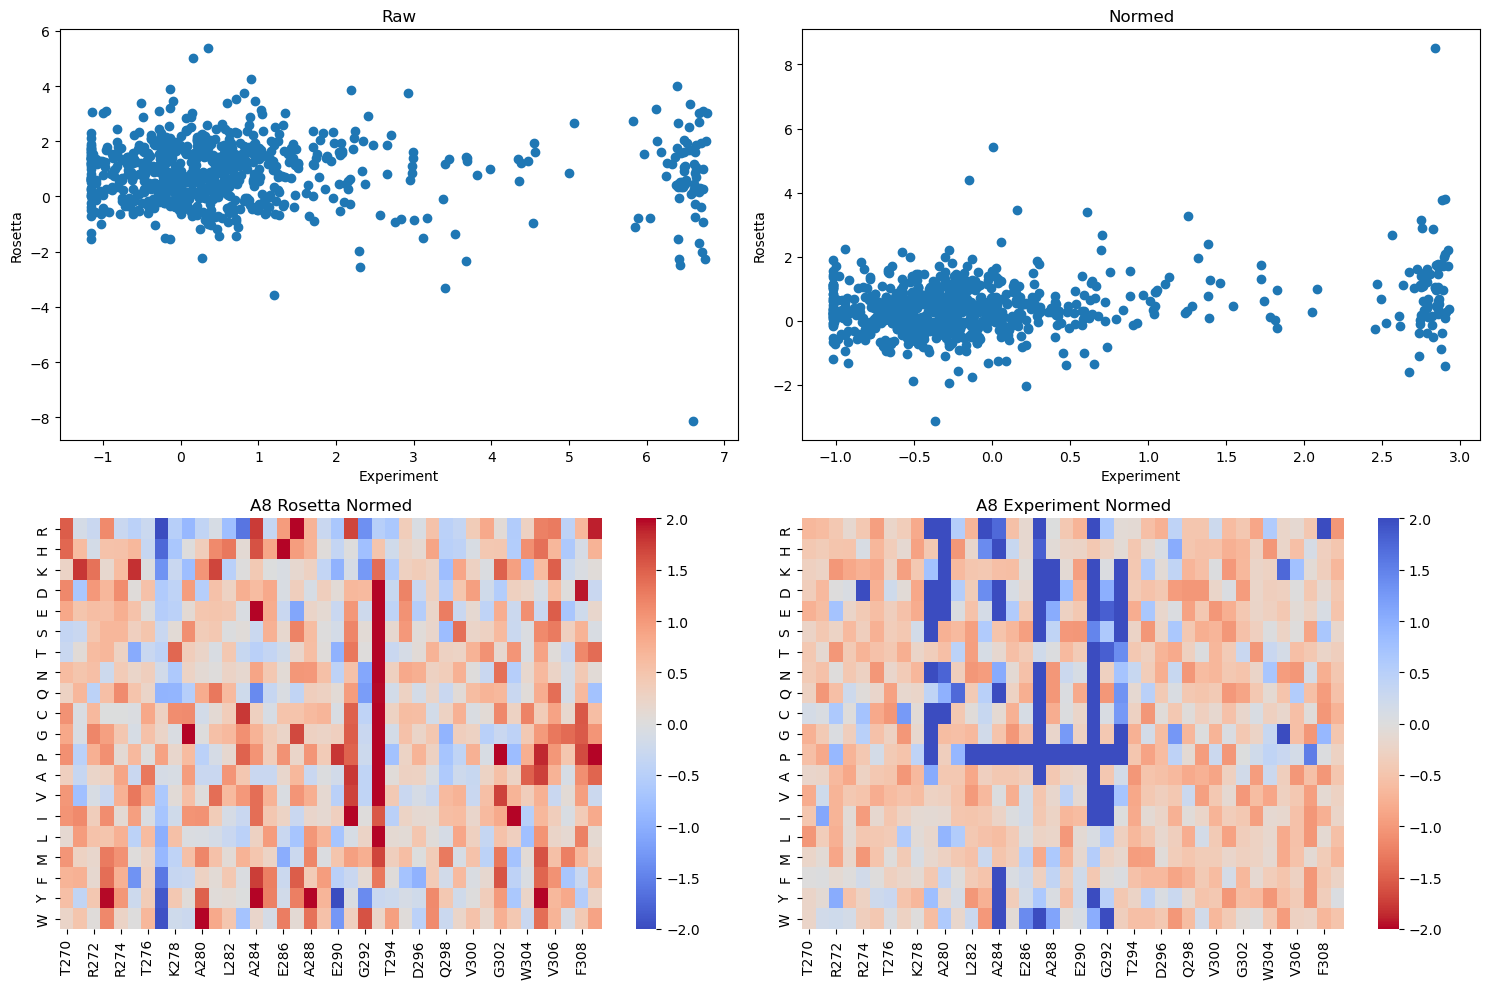

In [49]:
fig,axes = plt.subplots(2,2,figsize=(15,10))
ax1,ax2,ax3,ax4 = axes.flat
ax1.scatter(A8_experiment,A8_ros_4)
ax2.scatter(normalized_exp,normalized_df4)
sns.heatmap(normalized_df4,vmin=-2,vmax=2,ax=ax3,cmap='coolwarm')
sns.heatmap(normalized_exp,vmin=-2,vmax=2,ax=ax4,cmap='coolwarm_r')
ax1.set_title('Raw')
ax2.set_title('Normed')
ax3.set_title('A8 Rosetta Normed')
ax4.set_title('A8 Experiment Normed')
ax1.set_xlabel('Experiment')
ax1.set_ylabel('Rosetta')
ax2.set_xlabel('Experiment')
ax2.set_ylabel('Rosetta')
fig.tight_layout()

# Let's Convert to kcal/mol Data Treatment 5

In [26]:
def create_dfs_kcal(dic):
    con = 1/1.84
    temp_d = {res+str(270+i):{aa:0 for aa in residues} for i,res in enumerate(A8_sequence)}
    temp_norm = {res+str(270+i):{aa:0 for aa in residues} for i,res in enumerate(A8_sequence)}
    complex=[]
    mono=[]
    for key1,val1 in dic.items():
        for key2,val2 in val1.items():
            for key3,val3 in val2.items():
                if key3 == 'Complex':
                    complex.append(val3*con)
                if key3 == 'Mono':
                    mono.append(val3*con)
    c_mean = np.mean(complex)
    c_std = np.std(complex)
    m_mean = np.mean(mono)
    m_std = np.mean(mono)
    for key1,val1 in dic.items():
        for aa,val2 in val1.items():
            c = val2['Complex']*con
            m = val2['Mono']*con
            temp_d[key1][aa]+=c+m
            c_norm = (c-c_mean)/c_std
            m_norm = (m-m_mean)/m_std
            val = c_norm+m_norm
            temp_norm[key1][aa]+=val
    return pd.DataFrame(temp_d),pd.DataFrame(temp_norm)

In [27]:
A8_ros_5,normalized_df5 = create_dfs_kcal(temp_dic)

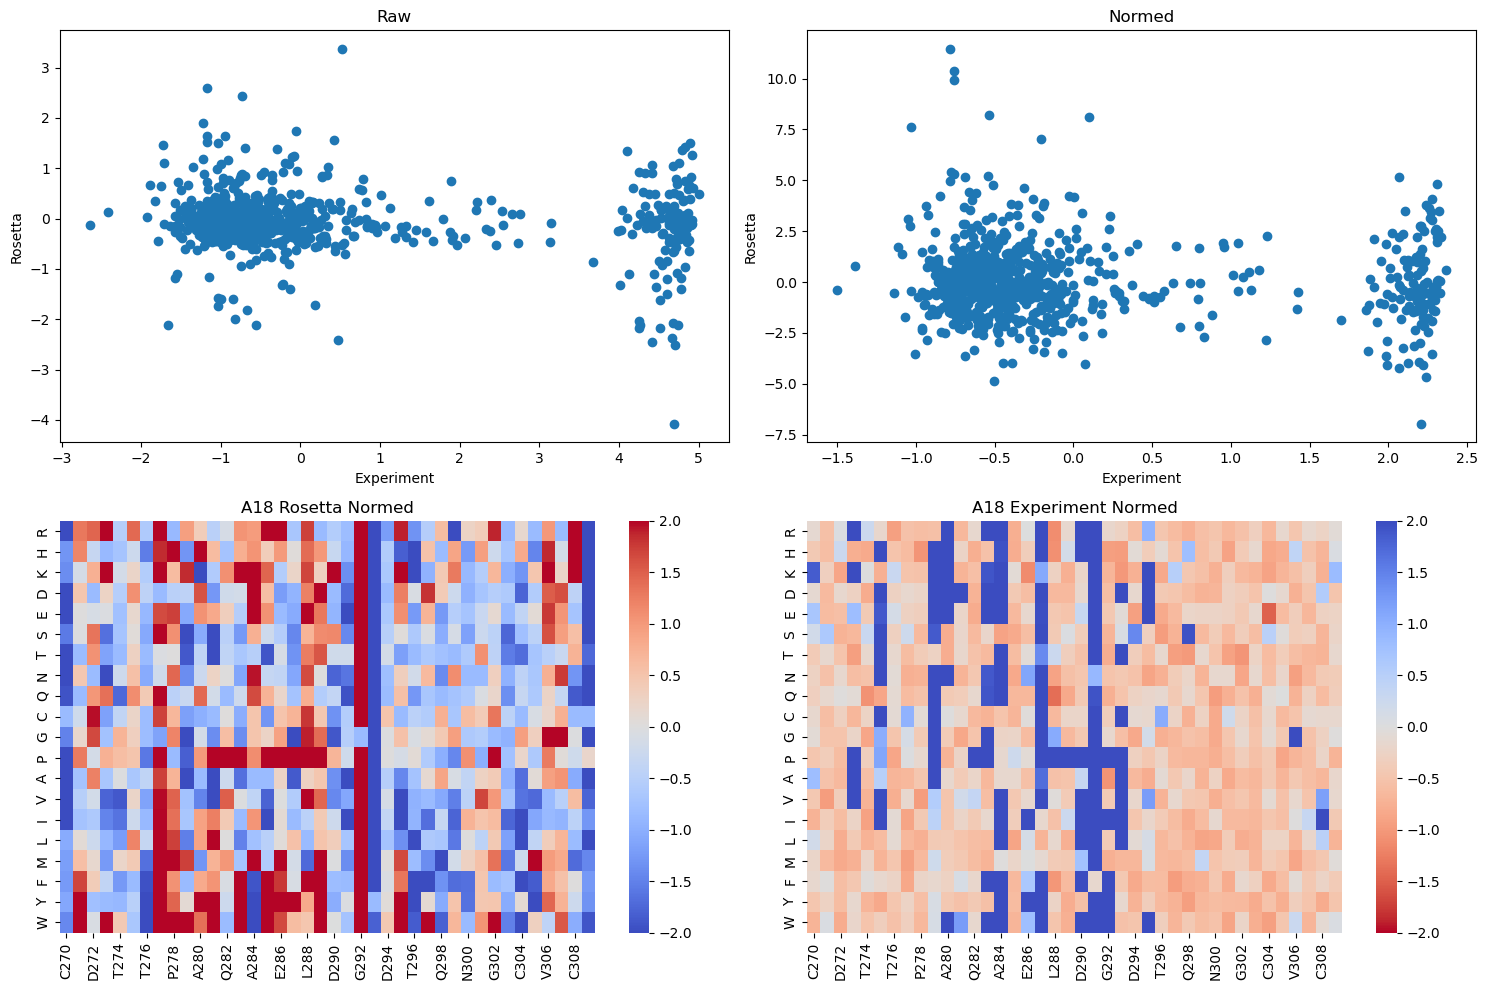

In [28]:
fig,axes = plt.subplots(2,2,figsize=(15,10))
ax1,ax2,ax3,ax4 = axes.flat
ax1.scatter(A8_experiment,A8_ros_5)
ax2.scatter(normalized_exp,normalized_df5)
sns.heatmap(normalized_df5,vmin=-2,vmax=2,ax=ax3,cmap='coolwarm')
sns.heatmap(normalized_exp,vmin=-2,vmax=2,ax=ax4,cmap='coolwarm_r')
ax1.set_title('Raw')
ax2.set_title('Normed')
ax3.set_title('A8 Rosetta Normed')
ax4.set_title('A8 Experiment Normed')
ax1.set_xlabel('Experiment')
ax1.set_ylabel('Rosetta')
ax2.set_xlabel('Experiment')
ax2.set_ylabel('Rosetta')
fig.tight_layout()

# Let's try Complex_ddg instead of Complex_total_score Data Treatment 6

In [29]:
temp_dic2 = {res+str(270+i):{aa:{'Complex':0,'Mono':0} for aa in residues} for i,res in enumerate(A8_sequence)}
for i,res in enumerate(A8_sequence):
        for aa in residues:
            new_seq=sequence[:i] + aa + sequence[i + 1:]
            temp_df = muts[muts['Sequence'] == new_seq]
            num = str(int(270)+int(i))
            key = ''.join([res,num])
            try:
                temp_dic2[key][aa]['Complex'] += float(temp_df.Complex_ddg.values[0])-float(WT.Complex_ddg.values[0])
                temp_dic2[key][aa]['Mono'] +=float(temp_df.Mono_total_score.values[0])-float(WT.Mono_total_score.values[0])
            except:
                pass

In [30]:
A8_ros_6,normalized_df6 = create_dfs(temp_dic2)

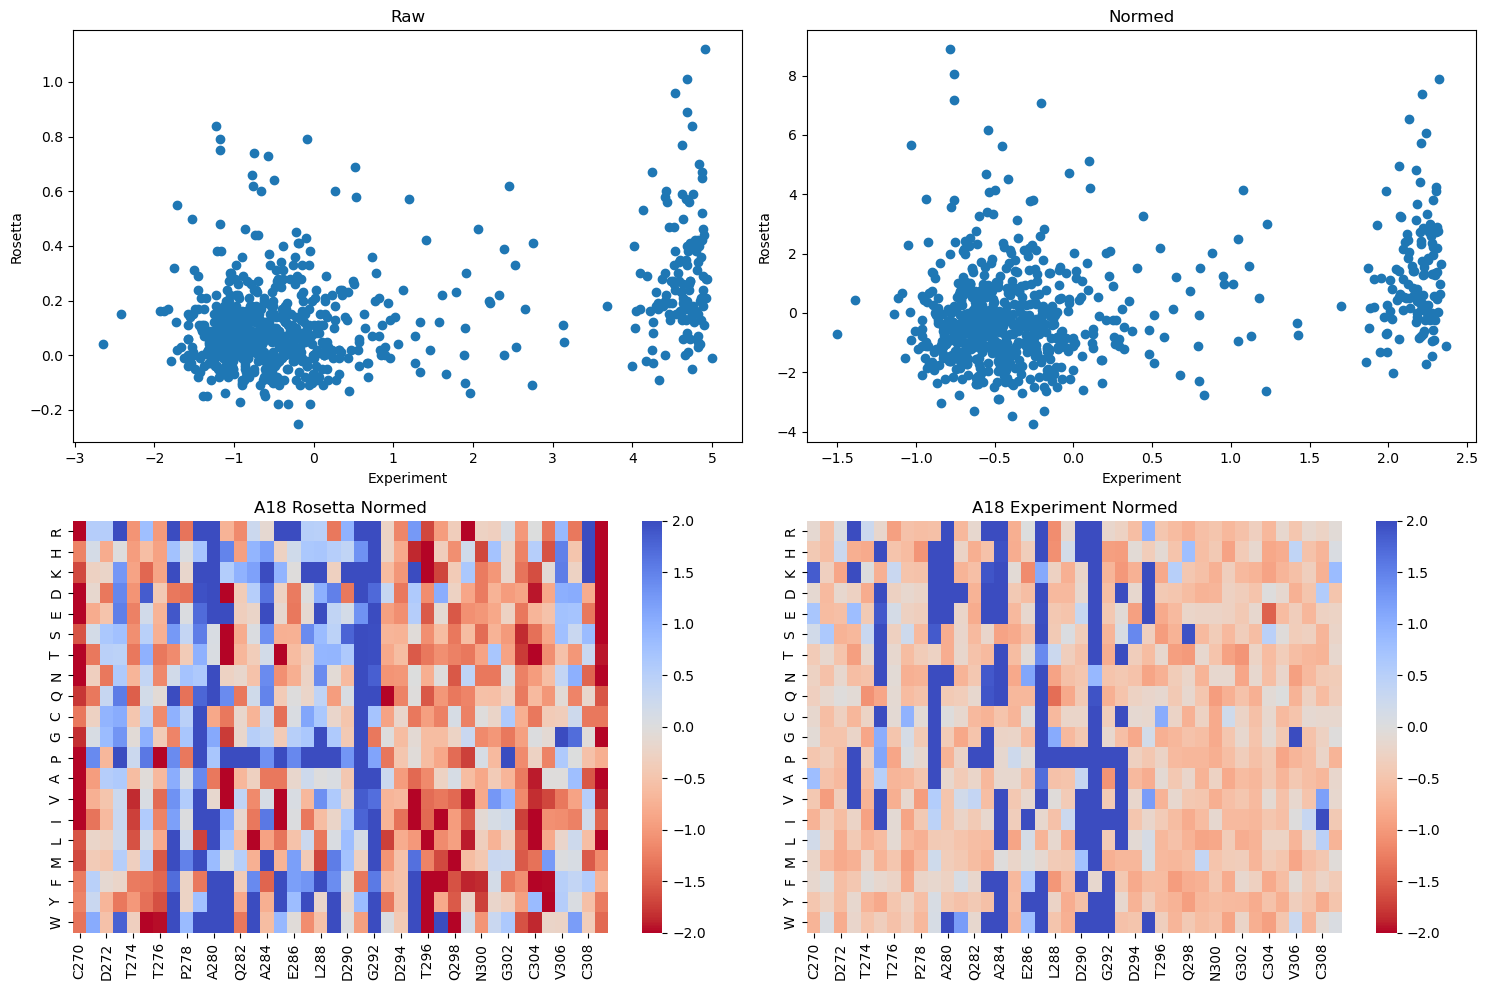

In [31]:
fig,axes = plt.subplots(2,2,figsize=(15,10))
ax1,ax2,ax3,ax4 = axes.flat
ax1.scatter(A8_experiment,A8_ros_6)
ax2.scatter(normalized_exp,normalized_df6)
sns.heatmap(normalized_df6,vmin=-2,vmax=2,ax=ax3,cmap='coolwarm_r')
sns.heatmap(normalized_exp,vmin=-2,vmax=2,ax=ax4,cmap='coolwarm_r')
ax1.set_title('Raw')
ax2.set_title('Normed')
ax3.set_title('A8 Rosetta Normed')
ax4.set_title('A8 Experiment Normed')
ax1.set_xlabel('Experiment')
ax1.set_ylabel('Rosetta')
ax2.set_xlabel('Experiment')
ax2.set_ylabel('Rosetta')
fig.tight_layout()

# And in kcal/mol Data Treatment 7

In [32]:
A8_ros_7,normalized_df7 = create_dfs_kcal(temp_dic2)

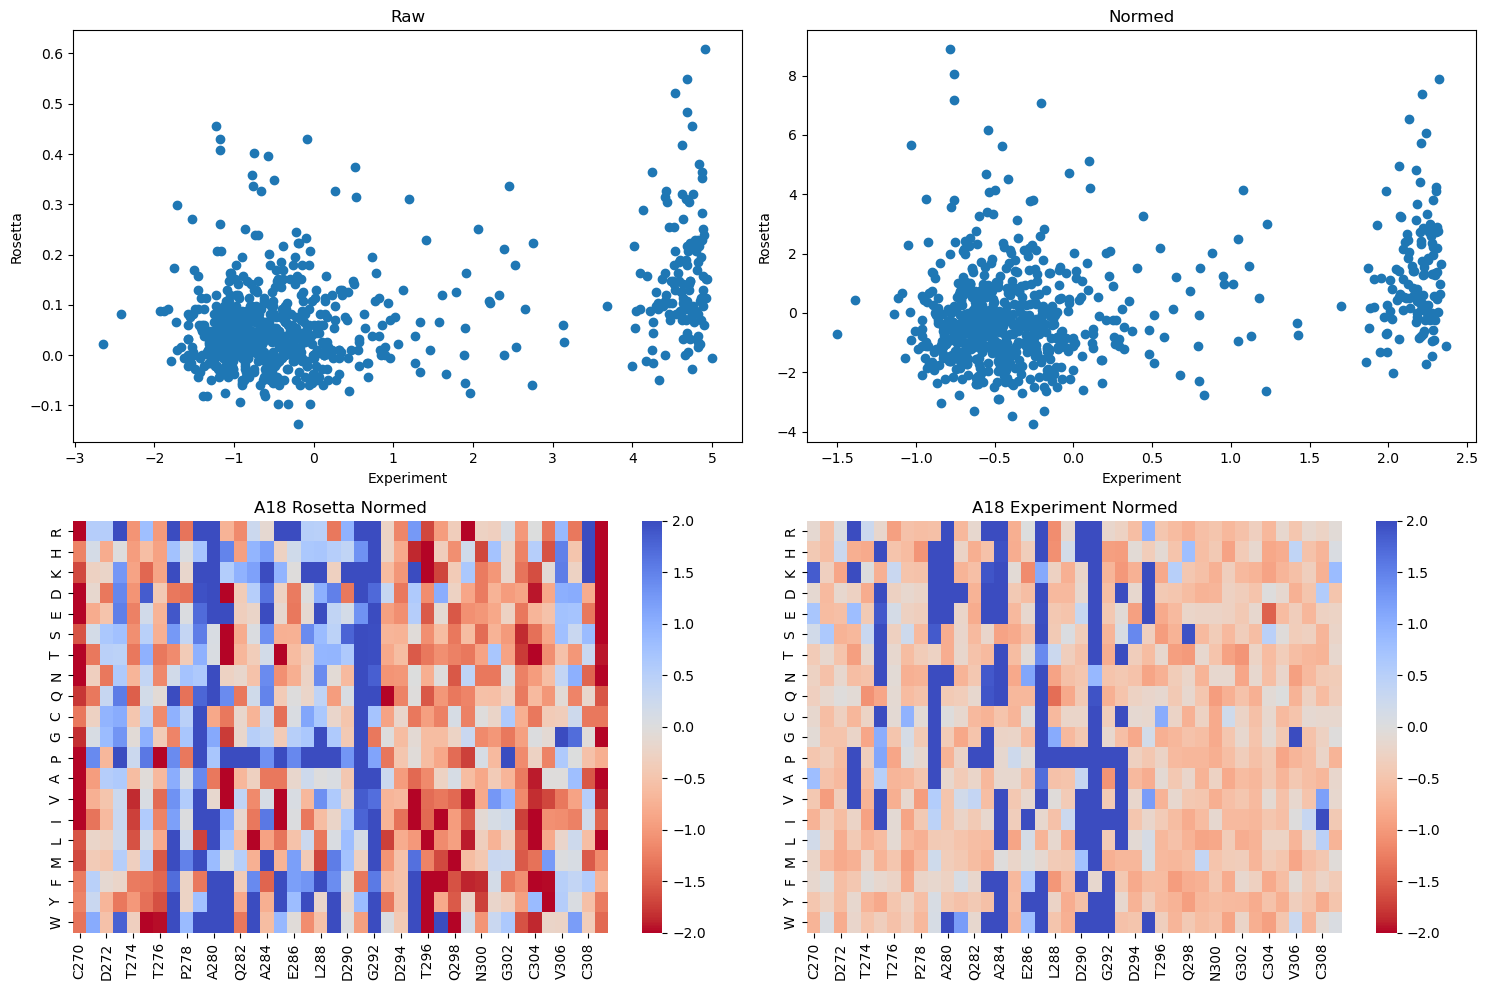

In [33]:
fig,axes = plt.subplots(2,2,figsize=(15,10))
ax1,ax2,ax3,ax4 = axes.flat
ax1.scatter(A8_experiment,A8_ros_7)
ax2.scatter(normalized_exp,normalized_df7)
sns.heatmap(normalized_df7,vmin=-2,vmax=2,ax=ax3,cmap='coolwarm_r')
sns.heatmap(normalized_exp,vmin=-2,vmax=2,ax=ax4,cmap='coolwarm_r')
ax1.set_title('Raw')
ax2.set_title('Normed')
ax3.set_title('A8 Rosetta Normed')
ax4.set_title('A8 Experiment Normed')
ax1.set_xlabel('Experiment')
ax1.set_ylabel('Rosetta')
ax2.set_xlabel('Experiment')
ax2.set_ylabel('Rosetta')
fig.tight_layout()

# Now lets compare all the methods

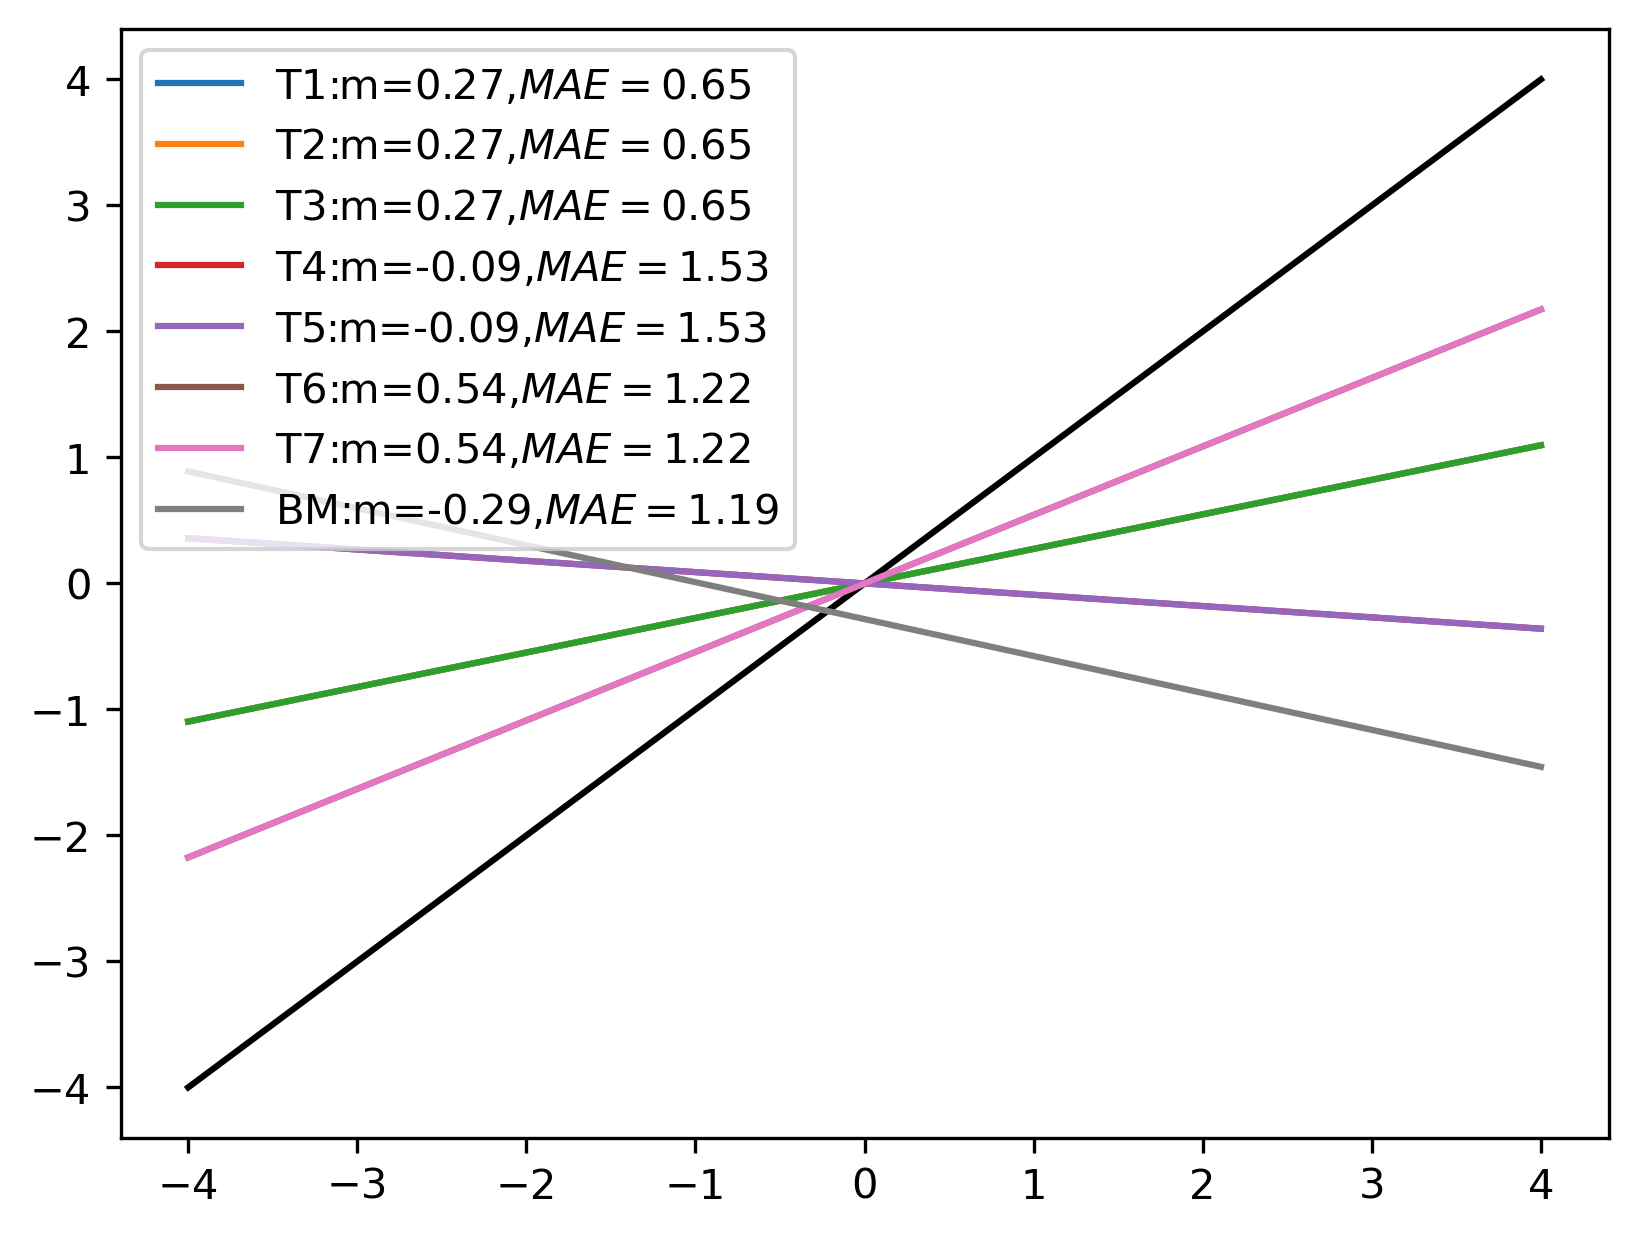

In [34]:
from scipy.stats import linregress
from sklearn.metrics import mean_absolute_error as mae
unity = np.linspace(-4,4)
fig,ax=plt.subplots(dpi=300)
plt.plot(unity,unity,c='k')
treatments=[normalized_df1.values.flatten(),normalized_df2.values.flatten(),normalized_df3.values.flatten(),normalized_df4.values.flatten(),
 normalized_df5.values.flatten(),normalized_df6.values.flatten(),normalized_df7.values.flatten(),
 A8_backmapped.values.flatten()]
e=[mae(normalized_exp.values.flatten(),y) for y in treatments]
labels=['T1','T2','T3','T4','T5','T6','T7','BM',]
regressions = [linregress(normalized_exp.values.flatten(),y) for y in treatments]
for i,reg in enumerate(regressions):
    m = reg.slope
    b = reg.intercept
    r = reg.rvalue
    ax.plot(unity,m*unity+b,label=f'{labels[i]}:m={round(m,2)},$MAE={round(e[i],2)}$')
ax.legend()

# Conclusion: Just about every data treatment I do here that could potentially be how they described theyre treatment of the Rosetta data outperforms the actual backmapped data. Either I'm missing something, they described their treatment wrong, or they did something wrong.

In [35]:
from natsort import *
A8_ros = pd.read_pickle('../../data/published_rosetta/A8_rosetta_data.pkl')
# Fix Rosetta A8 Df
A8_ros['Index']=A8_ros['Index'].astype('int')+ 270
A8_ros['Wild'] = A8_ros['Wild']+A8_ros['Index'].astype('str')
A8_ros.drop(columns='Index',inplace=True)
A8_ros = A8_ros.pivot(columns='Wild',index = 'Mut')
A8_ros.rename_axis(None,inplace=True)
A8_ros.rename_axis([None,None],axis=1,inplace=True)
A8_ros.columns = np.vstack(A8_ros.columns)[:,1]
mylist = list(A8_ros.columns)
numbers = [i[1:] for i in mylist]
indices = np.array(index_natsorted(numbers))
A8_ros = A8_ros[A8_ros.columns[indices]]
A8_ros=A8_ros.reindex(index)
A8_ros=A8_ros.fillna(0)
A8_ros = A8_ros.astype('float')
A8_ros

C270  Q271  D272  Y273  T274  F275  T276  D277  P278  F279  ...  N300  \
R  0.23  0.31  0.26 -0.21  0.66  0.41  0.22  0.08  0.47 -0.22  ...  0.59   
H  0.59 -0.11  0.17  0.13  0.30 -0.23 -0.31  0.15  0.24  0.07  ...  0.18   
K  0.65  0.34  0.09  0.41  0.38  0.22 -0.10  0.14  0.59 -0.10  ...  0.40   
D  0.59 -0.39  0.00 -0.15  0.50  0.47  0.13  0.00  0.43  0.19  ...  0.59   
E  0.38  0.47  0.15 -0.12  0.13  0.34 -0.17  0.19 -0.21  0.13  ...  0.57   
S  0.06  0.23  0.18  0.09  0.40 -0.09  0.14  0.61  0.13  0.57  ...  0.63   
T  0.40  0.00  0.29  0.03  0.00  0.16  0.00  0.06  0.49  0.30  ...  0.53   
N  0.57  0.43  0.00  0.69  0.28  0.42  0.30  0.63 -0.04  0.23  ...  0.00   
Q  0.26  0.00  0.37  0.13  0.45  0.08  0.14  0.17  0.52 -0.05  ...  0.11   
C  0.00  0.15 -0.12  0.44 -0.19  0.31  0.31 -0.08  0.42 -0.20  ...  0.23   
G  0.57  0.27  0.29  0.11  0.03 -0.23  0.02  0.16  0.54  0.38  ...  0.60   
P  0.53 -0.29  0.14 -0.21  0.57  0.61  0.34  0.30  0.00  0.41  ...  0.08   
A  0.48 -0.08  0.28  0.06 -0.29  0.20 -0.14  0.14  0.24  0.23  ...  0.38   
V  0.33  0.00  0.08  0.06  0.34 -0.09 -0.01  0.01  0.18  0.36  ...  0.10   
I  0.58  0.09  0.27  0.29  0.16  0.09  0.26  0.18  0.45  0.25  ...  0.16   
L  0.20 -0.03  0.21  0.14  0.60  0.39  0.40  0.09  0.24  0.25  ...  0.03   
M  0.62  0.41  0.47  0.37 -0.15  0.05  0.46  0.09  0.63  0.12  ...  0.44   
F  0.43  0.19  0.11  0.09 -0.01  0.00 -0.12  0.16  0.23  0.00  ...  0.59   
Y  0.54  0.08 -0.03  0.00  0.28  0.34  0.47  0.07  0.52  0.02  ...  0.64   
W  0.54  0.10 -0.14 -0.11 -0.04 -0.42  0.23  0.09  0.08 -0.02  ...  0.10   

   N301  G302  E303  C304  R305  V306  R307  C308  C309  
R  0.57  0.23 -0.20  0.12  0.00  0.25  0.00 -0.04  0.53  
H  0.43  0.33  0.61  0.24  0.57 -0.02  0.17  0.04  0.54  
K  0.31  0.24  0.10  0.47  0.59  0.10  0.26 -0.07  0.18  
D  0.29 -0.19  0.48  0.63  0.14 -0.23  0.29  0.21  0.37  
E  0.55  0.30  0.00 -0.11 -0.07  0.13  0.44  0.00  0.31  
S  0.56  0.33  0.54  0.02  0.52  0.11 -0.18  0.40  0.47  
T  0.59  0.33  0.55  0.41 -0.24 -0.02  0.40  0.02  0.48  
N  0.00  0.29  0.60  0.35  0.32  0.09  0.26 -0.08  0.22  
Q  0.59  0.30  0.60 -0.04  0.56  0.17 -0.09  0.28  0.48  
C  0.40  0.41  0.52  0.00  0.29  0.22 -0.14  0.00  0.00  
G  0.33  0.00  0.12  0.24 -0.04  0.37  0.22  0.23  0.28  
P  0.45  0.30  0.60 -0.12  0.56  0.50  0.38  0.63  0.32  
A  0.58  0.33  0.57  0.22  0.48  0.31  0.33 -0.01  0.12  
V  0.62  0.24  0.60  0.22 -0.22  0.00 -0.35  0.22  0.32  
I  0.41  0.28  0.61  0.35  0.55  0.13  0.33  0.15  0.12  
L  0.48  0.23  0.23 -0.21  0.11  0.04  0.34  0.28  0.47  
M  0.45  0.29  0.59  0.34  0.09  0.41  0.43 -0.11  0.61  
F  0.45  0.00 -0.01  0.13  0.24 -0.41  0.09 -0.04 -0.14  
Y  0.37 -0.39  0.62  0.16  0.57  0.23  0.33 -0.10  0.05  
W  0.50  0.30  0.58  0.43  0.57  0.01  0.30 -0.19  0.07  

[20 rows x 40 columns]

Text(0.5, 1.01, 'Comparison to Chevalier Fig. 3f')

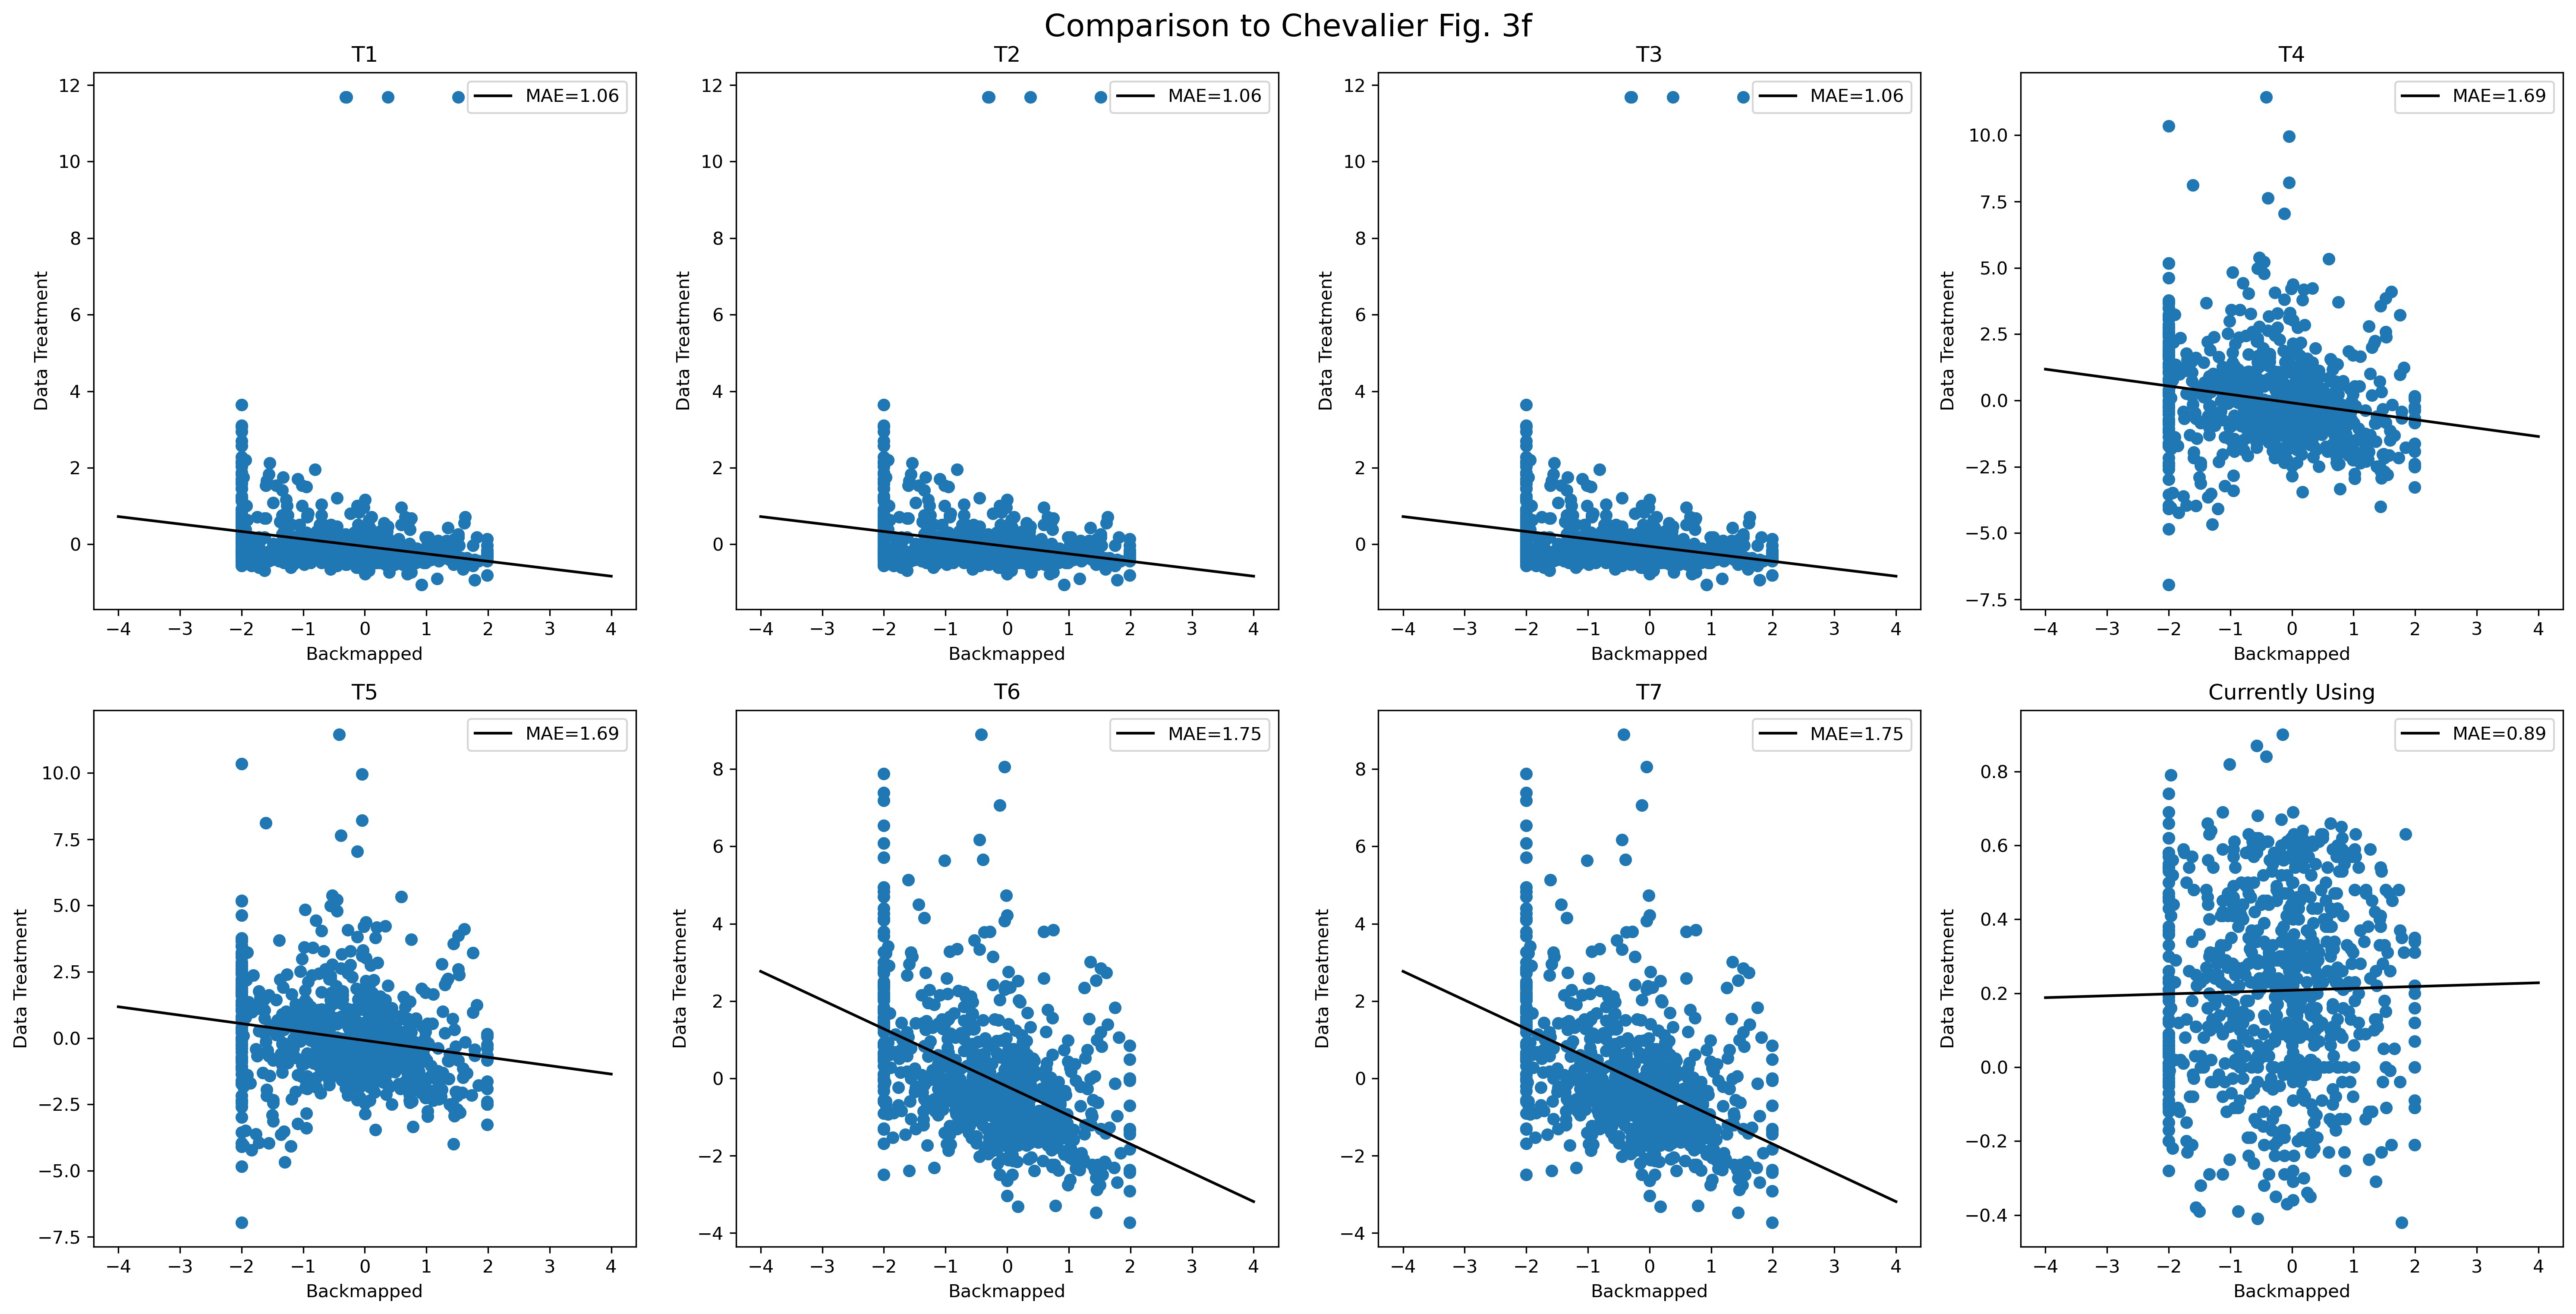

In [36]:
treatments=[normalized_df1.values.flatten(),normalized_df2.values.flatten(),normalized_df3.values.flatten(),normalized_df4.values.flatten(),
 normalized_df5.values.flatten(),normalized_df6.values.flatten(),normalized_df7.values.flatten(),
 A8_ros.values.flatten()]
unity = np.linspace(-4,4)
x = A8_backmapped.values.flatten()
e=[mae(x,y) for y in treatments]
labels=['T1','T2','T3','T4','T5','T6','T7','Currently Using',]
regressions = [linregress(x,y) for y in treatments]
fig,axes = plt.subplots(2,4,figsize=(20,10),dpi=300)
for i,ax in enumerate(axes.flat):
    y = treatments[i]
    err = e[i]
    reg = regressions[i]
    m = reg.slope
    b = reg.intercept
    ax.scatter(x,y)
    ax.plot(unity,m*unity+b,label=f'MAE={round(e[i],2)}',c='k')
    ax.set_title(labels[i])
    ax.set_xlabel('Backmapped')
    ax.set_ylabel('Data Treatment')
    ax.legend()
fig.tight_layout()
fig.suptitle('Comparison to Chevalier Fig. 3f',fontsize='xx-large',y=1.01)



Text(0.5, 1.01, 'Comparison to Normalized Experiment')

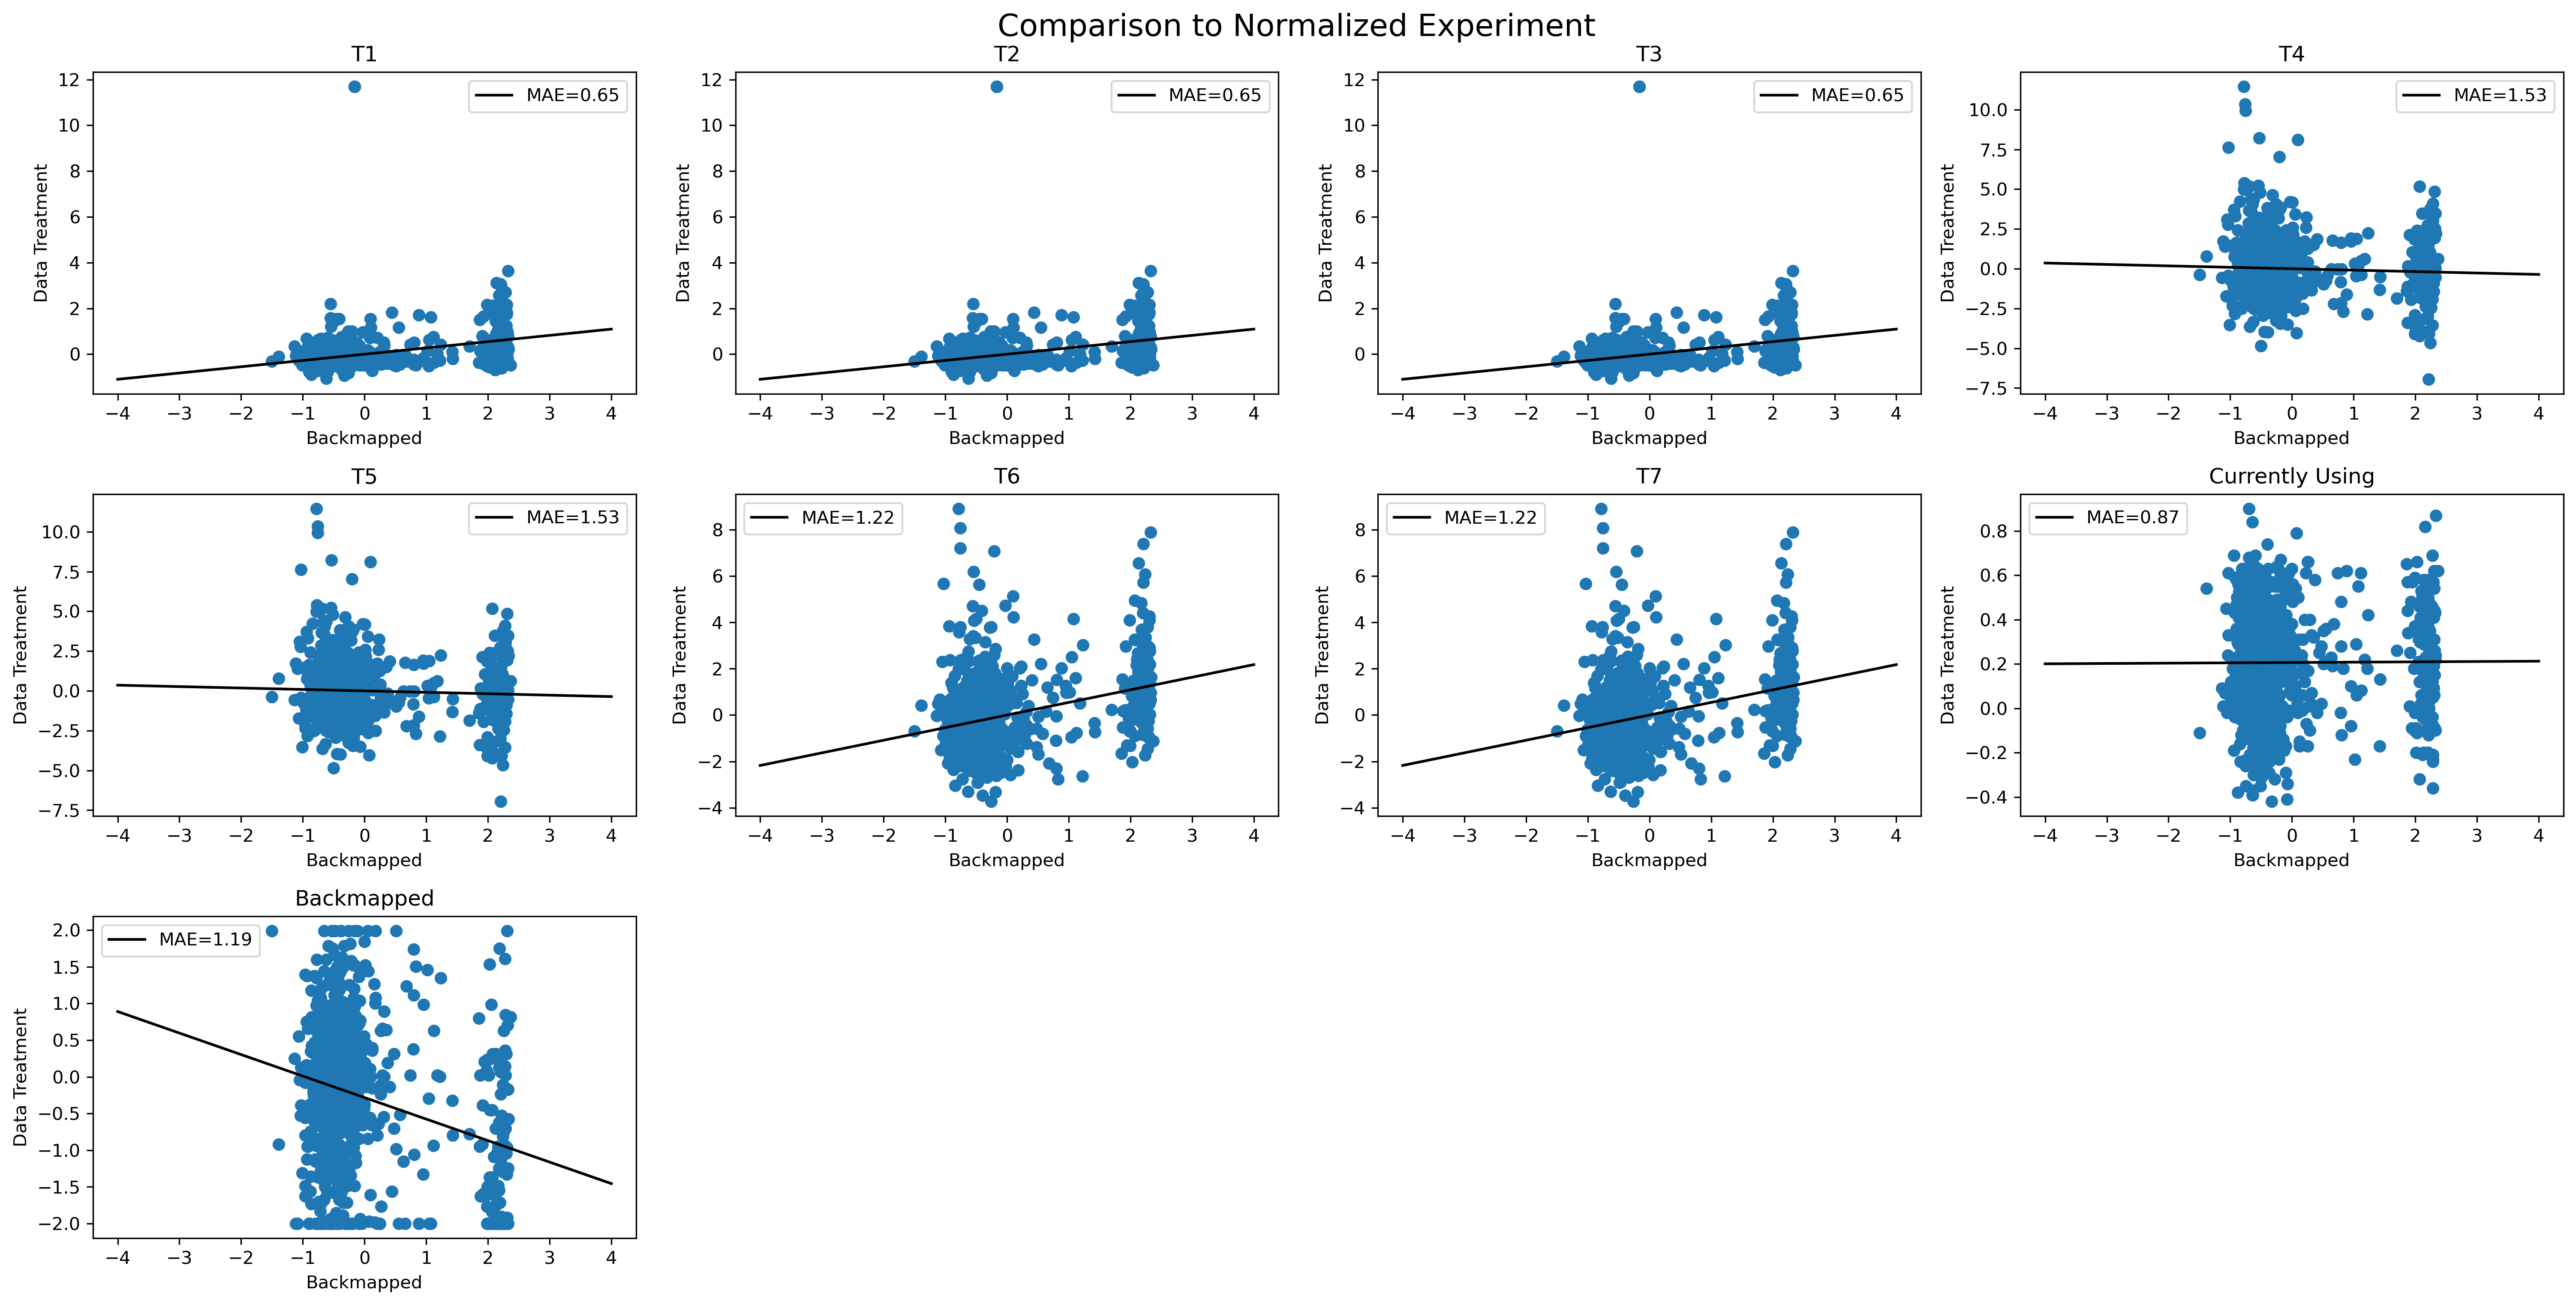

In [37]:
treatments=[normalized_df1.values.flatten(),normalized_df2.values.flatten(),normalized_df3.values.flatten(),normalized_df4.values.flatten(),
 normalized_df5.values.flatten(),normalized_df6.values.flatten(),normalized_df7.values.flatten(),
 A8_ros.values.flatten(),A8_backmapped.values.flatten()]
unity = np.linspace(-4,4)
x = normalized_exp.values.flatten()
e=[mae(x,y) for y in treatments]
labels=['T1','T2','T3','T4','T5','T6','T7','Currently Using','Backmapped']
regressions = [linregress(x,y) for y in treatments]
fig,axes = plt.subplots(3,4,figsize=(20,10),dpi=300)
for i,ax in enumerate(axes.flat):
    if i >= len(e):
        ax.remove()
        continue
    y = treatments[i]
    err = e[i]
    reg = regressions[i]
    m = reg.slope
    b = reg.intercept
    ax.scatter(x,y)
    ax.plot(unity,m*unity+b,label=f'MAE={round(e[i],2)}',c='k')
    ax.set_title(labels[i])
    ax.set_xlabel('Backmapped')
    ax.set_ylabel('Data Treatment')
    ax.legend()
fig.tight_layout()
fig.suptitle('Comparison to Normalized Experiment',fontsize='xx-large',y=1.01)

Text(0.5, 1.01, 'Comparison to Raw Experiment')

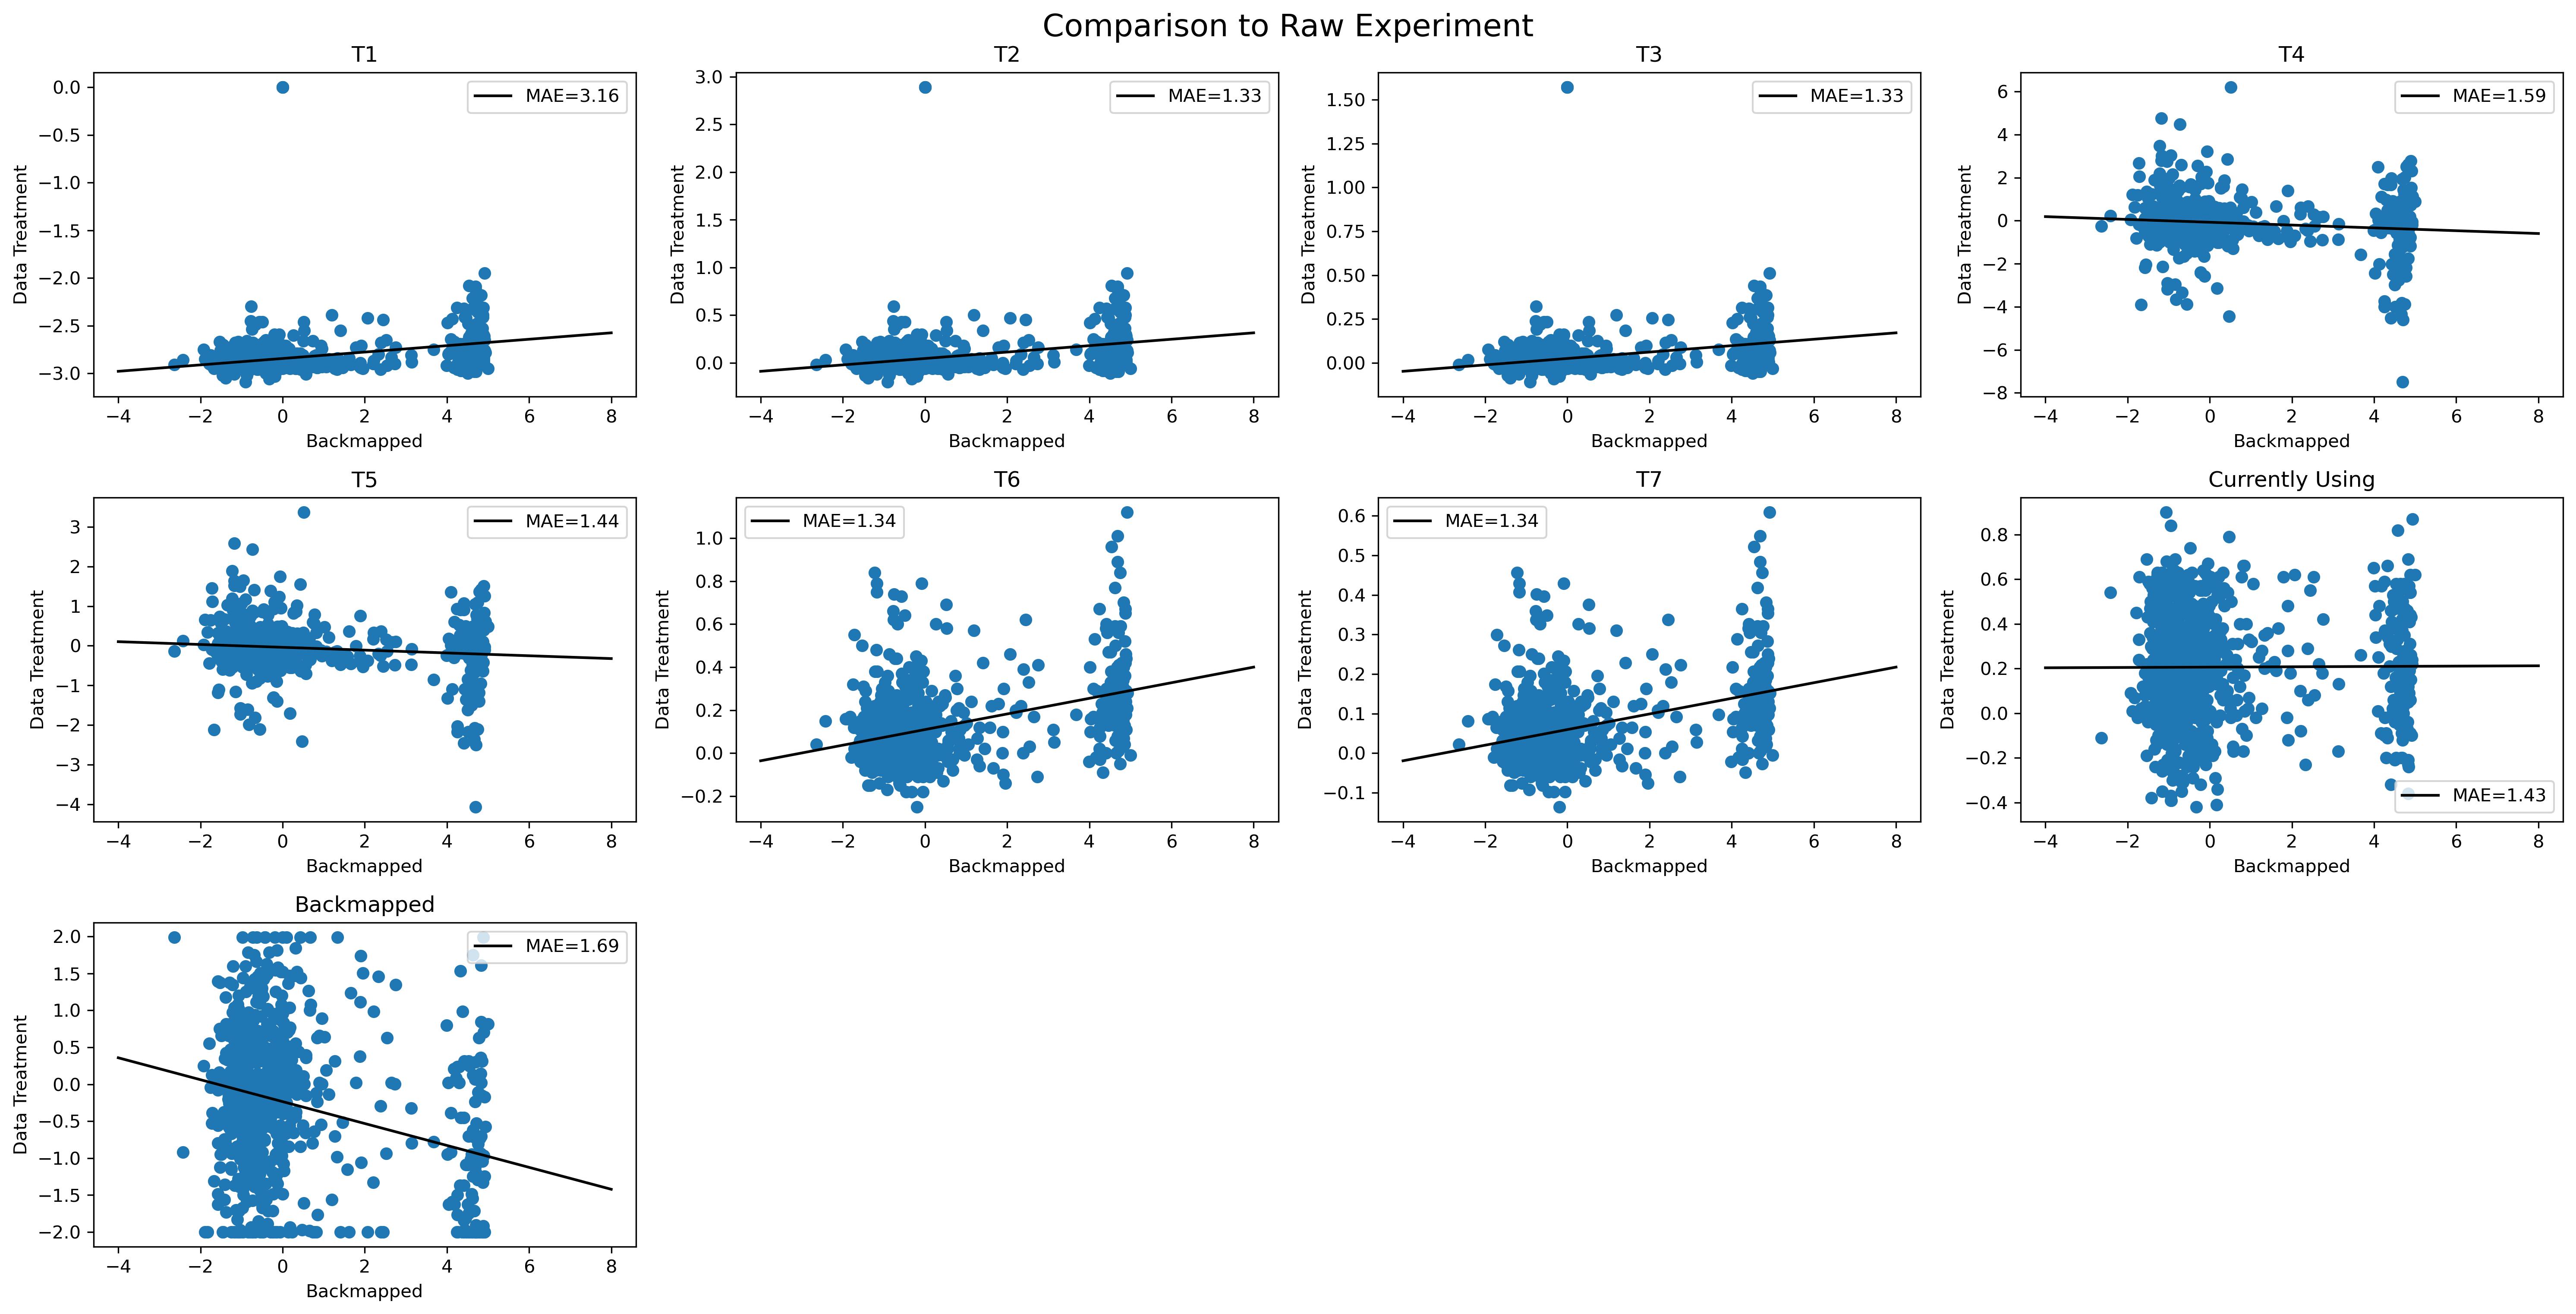

In [38]:
treatments=[A8_ros_1.values.flatten(),A8_ros_2.values.flatten(),A8_ros_3.values.flatten(),A8_ros_4.values.flatten(),
 A8_ros_5.values.flatten(),A8_ros_6.values.flatten(),A8_ros_7.values.flatten(),
 A8_ros.values.flatten(),A8_backmapped.values.flatten()]
unity = np.linspace(-4,8)
x = A8_experiment.values.flatten()
e=[mae(x,y) for y in treatments]
labels=['T1','T2','T3','T4','T5','T6','T7','Currently Using','Backmapped']
regressions = [linregress(x,y) for y in treatments]
fig,axes = plt.subplots(3,4,figsize=(20,10),dpi=300)
for i,ax in enumerate(axes.flat):
    if i >= len(e):
        ax.remove()
        continue
    y = treatments[i]
    err = e[i]
    reg = regressions[i]
    m = reg.slope
    b = reg.intercept
    ax.scatter(x,y)
    ax.plot(unity,m*unity+b,label=f'MAE={round(e[i],2)}',c='k')
    ax.set_title(labels[i])
    ax.set_xlabel('Backmapped')
    ax.set_ylabel('Data Treatment')
    ax.legend()
fig.tight_layout()
fig.suptitle('Comparison to Raw Experiment',fontsize='xx-large',y=1.01)

In [50]:
A8_contacts=  np.load('../../data/contacts/A8_contacts.npy',allow_pickle=True).item()

In [54]:
def dict_to_latex_table(data, caption=""):
    table_header = "\\begin{table}[htbp]\n"
    table_footer = "\\end{table}\n"

    if not data:
        return "Empty dictionary, cannot generate table."

    # Generate column headers
    column_headers = "\\begin{tabular}{|c|c|}\n"
    column_headers += "\\hline\n"
    column_headers += "Residue & Contacts \\\\\n"
    column_headers += "\\hline\n"

    # Generate table body with horizontal lines
    table_body = "\\hline\n"
    for key, values in data.items():
        contacts_str = ", ".join(values)
        table_body += f"{key} & {contacts_str} \\\\\n"
        table_body += "\\hline\n"

    # Combine all parts to form the LaTeX table
    latex_table = (
        table_header
        + "\\centering\n"
        + "\\begin{tabular}{|c|c|}\n"
        + "\\hline\n"
        + "Residue & Contacts \\\\\n"
        + "\\hline\n"
        + table_body
        + "\\end{tabular}\n"
        + f"\\caption{{{caption}}}\n"
        + "\\end{table}\n"
    )

    return latex_table

latex_table_output = dict_to_latex_table(A8_contacts,'SI Table 1. A8 contacts')
print(latex_table_output)

\begin{table}[htbp]
\centering
\begin{tabular}{|c|c|}
\hline
Residue & Contacts \\
\hline
\hline
T270 & Q140, S271, R272, T307, F308, D309 \\
\hline
S271 & Q140, R272, V273, V306, T307, F308 \\
\hline
R272 & V273, E305, V306, T307 \\
\hline
V273 & I143, D144, R274, A275, W304, E305, V306, F308 \\
\hline
R274 & N148, A275, Q303, W304, E305 \\
\hline
A275 & N148, N151, T276, Q303, W304 \\
\hline
T276 & E155, S277, K278, A281, G302, Q303, W304 \\
\hline
S277 & I154, K278, F279, A280, A281, W304 \\
\hline
K278 & F279, A280, A281, L282, W304 \\
\hline
F279 & L36, S63, L64, P65, V150, I154, A280, A281, L282, I283 \\
\hline
A280 & V150, N151, A281, L282, I283, A284 \\
\hline
A281 & L282, I283, A284, A285, V297, W304, V306 \\
\hline
L282 & I283, A284, A285, E286 \\
\hline
I283 & T90, V150, A284, A285, E286, I287 \\
\hline
A284 & T147, A285, E286, I287, A288, V306 \\
\hline
A285 & E286, I287, A288, R289, V295, V297, V306 \\
\hline
E286 & I287, A288, R289, E290 \\
\hline
I287 & I143, A288, R289,